# Tyre Defect Classification Project
This project focuses on classifying tyre images into two categories:
- **Good**
- **Defective**

We will:

1. Perform **EDA** to understand the dataset.
2. Use a **Basic CNN** to classify tyre images.
3. Tune the hyperparameters using **Optuna** to improve performance.
4. Evaluate the model using accuracy, confusion matrix, and classification report.


### Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---

### **Section 1: Dataset Splits**

---

#### **Objective**
The objective of this section is to split the dataset of tyre images into **training**, **validation**, and **test** sets, ensuring a clean and structured folder organization for subsequent use in data generators and model training.

---

#### **Code Description**

1. **Dataset Path Definitions**:
   - Defined paths for the original dataset directory (`data_dir`) and the output directories for training, validation, and test splits (`train_dir`, `val_dir`, `test_dir`).

2. **Directory Creation**:
   - Created subdirectories for `Good` and `Defective` tyres within the `train`, `val`, and `test` directories using `os.makedirs()`.

   **Output**:
   - Prints a success message indicating that the directories were created.

3. **Dataset Splitting**:
   - A utility function `split_and_copy` was implemented to:
     - Split the dataset using `train_test_split` from `sklearn`:
       - `80%` for training, `10%` for validation, and `10%` for testing.
     - Copy images from the original dataset to the corresponding split directories.

4. **Processing Both Classes**:
   - The function `split_and_copy` was called twice:
     - Once for splitting and copying `Good` tyre images.
     - Once for splitting and copying `Defective` tyre images.

   **Output**:
   - Prints a success message once the dataset splitting is complete.

---

#### **Folder Structure after Execution**

```
Project/
├── dataset/
│   ├── Good/
│   ├── Defective/
├── split/
│   ├── train/
│   │   ├── Good/
│   │   ├── Defective/
│   ├── val/
│   │   ├── Good/
│   │   ├── Defective/
│   ├── test/
│   │   ├── Good/
│   │   ├── Defective/
```

---



In [ ]:
# -----------------------------------------------
# 1. Dataset splits
# -----------------------------------------------
import os
from sklearn.model_selection import train_test_split
import shutil

# Define dataset paths - train, val, and test
data_dir = '/content/drive/MyDrive/AAI-521/Project/dataset'
train_dir = '/content/drive/MyDrive/AAI-521/Project/split/train'
val_dir = '/content/drive/MyDrive/AAI-521/Project/split/val'
test_dir = '/content/drive/MyDrive/AAI-521/Project/split/test'


# Define split directories
split_dirs = [train_dir, val_dir, test_dir]

# Create directories for train, val, and test splits
for split_dir in split_dirs:
    os.makedirs(os.path.join(split_dir, "Good"), exist_ok=True)
    os.makedirs(os.path.join(split_dir, "Defective"), exist_ok=True)

print("Train, Validation, and Test directories created successfully!")

# Split Dataset
def split_and_copy(source_dir, train_dest, val_dest, test_dest, test_size=0.2, val_size=0.1):
    files = os.listdir(source_dir)
    train_files, test_files = train_test_split(files, test_size=test_size + val_size, random_state=42)
    val_files, test_files = train_test_split(test_files, test_size=test_size / (test_size + val_size), random_state=42)

    for f in train_files:
        shutil.copy(os.path.join(source_dir, f), train_dest)
    for f in test_files:
        shutil.copy(os.path.join(source_dir, f), test_dest)
    for f in val_files:
        shutil.copy(os.path.join(source_dir, f), val_dest)

# Split Good Tyres
split_and_copy(
    os.path.join(data_dir, "Good"),
    os.path.join(train_dir, "Good"),
    os.path.join(val_dir, "Good"),
    os.path.join(test_dir, "Good")
)

# Split Defective Tyres
split_and_copy(
    os.path.join(data_dir, "Defective"),
    os.path.join(train_dir, "Defective"),
    os.path.join(val_dir, "Defective"),
    os.path.join(test_dir, "Defective")
)

print("Dataset split into train, test, and validation sets!")



Train, Validation, and Test directories created successfully!
Dataset split into train, test, and validation sets!


### **Section 2: Exploratory Data Analysis (EDA)**
---

#### **Objective**
The objective of this section is to analyze the dataset visually and statistically to better understand the class distribution, data quality, and image properties. EDA helps identify potential issues in the dataset and provides insights for data preprocessing and augmentation.

---


#### **Code Description**

1. **Class Distribution Visualization**:
   - **Function: `plot_class_distribution_with_counts`**
     - Calculates the number of images in each class (`Good` and `Defective`) for a given directory (e.g., `train`, `val`, `test`).
     - Plots a bar chart with counts displayed at the center of each bar for clarity.
   - **Use Case**:
     - Displays the distribution of images in the entire dataset as well as in the training, validation, and test splits.

2. **Sample Image Visualization**:
   - **Function: `visualize_samples`**
     - Displays a grid of sample images from a specified class (`Good` or `Defective`).
   - **Use Case**:
     - Helps visually inspect the quality and content of the images in the dataset.

3. **Image Dimension Analysis**:
   - **Function: `check_image_dimensions`**
     - Iterates through all images in the training dataset and extracts their dimensions (width and height).
     - Plots a scatter plot of image dimensions to check for variability in image sizes.
   - **Use Case**:
     - Identifies whether images need resizing for model input compatibility.


#### **Key Insights and Analysis**

#### **1. Dataset Class Distribution**

- **Observation**:
  - The dataset contains **832 images** of the `Good` class and **866 images** of the `Defective` class.
  - This indicates a balanced dataset, as the difference between the two classes is minimal.

- **Insight**:
  - A balanced dataset is ideal for training models, as it reduces the risk of bias toward the majority class during classification.


#### **2. Training Set Class Distribution**

- **Observation**:
  - The training set consists of **582 images** of the `Good` class and **606 images** of the `Defective` class.
  - The split retains the overall class balance of the original dataset.

- **Insight**:
  - The training set's class distribution is sufficient to provide diverse examples of both classes for the model to learn.


#### **3. Validation Set Class Distribution**

- **Observation**:
  - The validation set contains **83 images** of the `Good` class and **86 images** of the `Defective` class.
  - The validation set maintains the class balance observed in the original dataset.

- **Insight**:
  - This balanced validation set ensures fair evaluation of the model during training and helps prevent biased validation metrics.


#### **4. Test Set Class Distribution**

- **Observation**:
  - The test set contains **167 images** of the `Good` class and **174 images** of the `Defective` class.
  - Similar to the other splits, the test set retains the balance between classes.

- **Insight**:
  - The balanced test set enables unbiased assessment of the final model’s performance on unseen data.


#### **5. Sample Images**

- **Observation**:
  - Sample images from both classes (`Good` and `Defective`) reveal clear visual differences:
    - `Good Tyres` appear intact and free of visible damages.
    - `Defective Tyres` exhibit significant wear, cracks, and visible defects.
  - The samples also demonstrate adequate image quality for feature extraction.

- **Insight**:
  - The visual distinctions between the two classes indicate that the dataset provides sufficient features for the model to learn to differentiate between the classes.


#### **6. Image Dimensions in Training Dataset**

- **Observation**:
  - The scatter plot of image dimensions shows that most images are **square-shaped**, with dimensions ranging from 1200x1200 to 2200x2200 pixels.

- **Insight**:
  - Images are not uniformly sized and will need to be resized (e.g., to 128x128 pixels) for compatibility with the convolutional neural network (CNN).
  - This resizing ensures uniformity in model input and reduces computational overhead.


#### **Conclusions from EDA**

1. **Balanced Dataset**:
   - The dataset and its splits (training, validation, test) are balanced, ensuring fair training, validation, and testing.

2. **Sufficient Data Quality**:
   - Sample images indicate sufficient visual features to distinguish between the two classes.

3. **Preprocessing Needs**:
   - Resizing all images to a fixed size (e.g., 128x128 pixels) is necessary for consistency with CNN input requirements.

4. **Dataset Readiness**:
   - The dataset is well-structured and ready for data augmentation, model training, and evaluation.


Dataset Distribution:


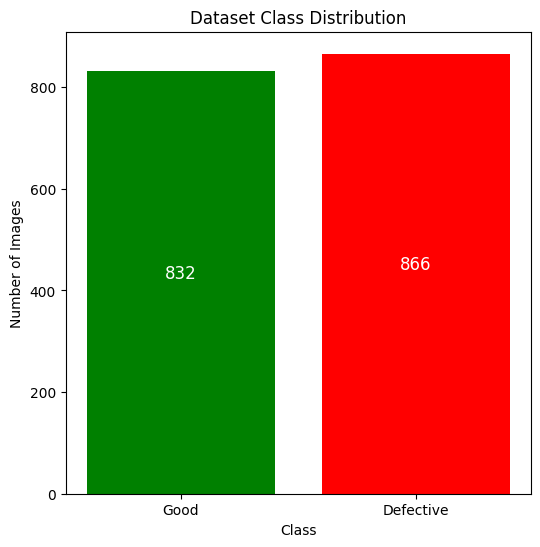

Training Set Distribution:


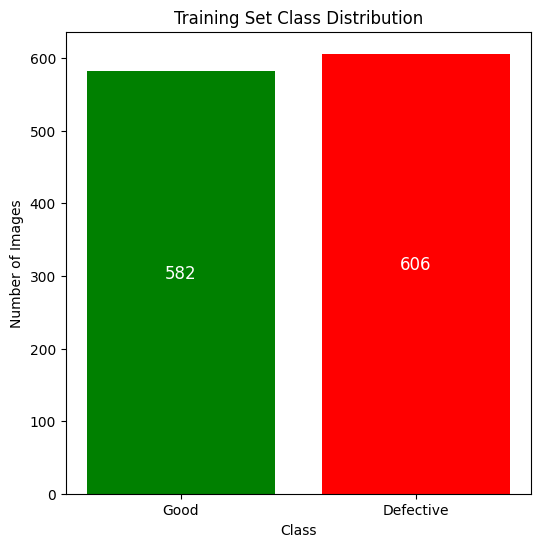

Test Set Distribution:


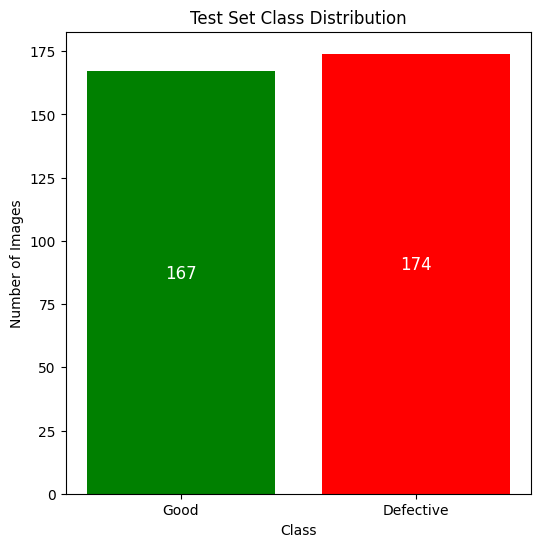

Validation Set Distribution:


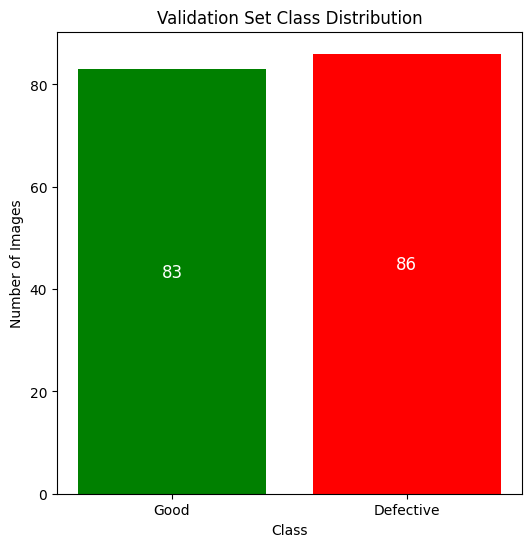

Sample Images from 'Good' Class:


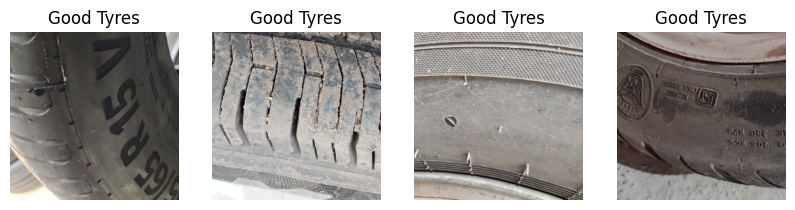

Sample Images from 'Defective' Class:


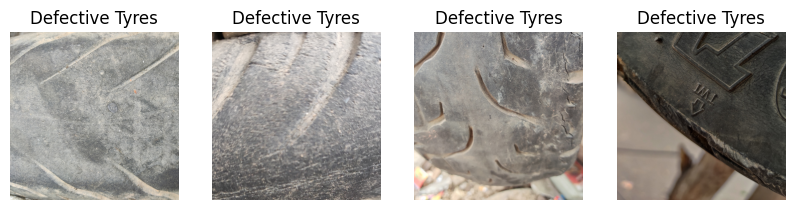

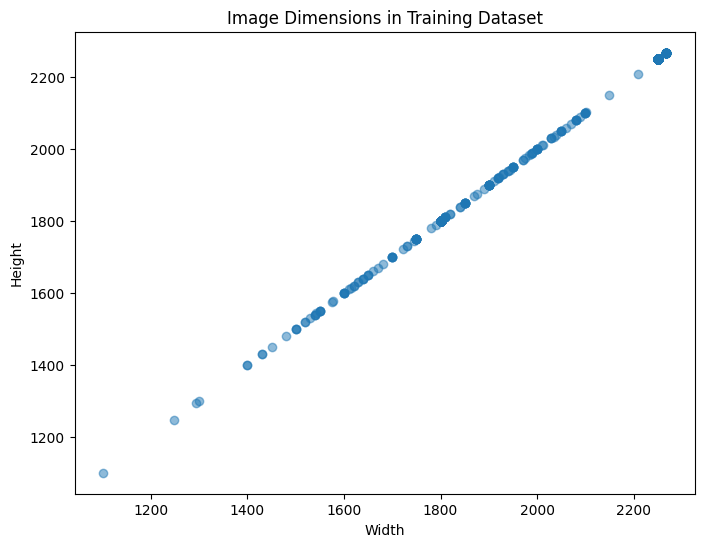

In [ ]:
# -----------------------------------------------
# 2. EDA Functions and Visualizations
# -----------------------------------------------

# Import necessary libraries
import os
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

# Function: Plot Class Distribution
def plot_class_distribution_with_counts(folder, title):
    classes = ['Good', 'Defective']
    counts = [len(os.listdir(os.path.join(folder, cls))) for cls in classes]

    plt.figure(figsize=(6, 6))
    bars = plt.bar(classes, counts, color=['green', 'red'])
    plt.title(title)
    plt.xlabel("Class")
    plt.ylabel("Number of Images")

    for bar in bars:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() - bar.get_height() / 2,
            str(bar.get_height()),
            ha='center', va='bottom', fontsize=12, color='white'
        )
    plt.show()

# Function: Visualize Sample Images
def visualize_samples(folder, title, sample_count=4):
    files = os.listdir(folder)[:sample_count]
    plt.figure(figsize=(10, 5))
    for i, file in enumerate(files):
        img = plt.imread(os.path.join(folder, file))
        plt.subplot(1, sample_count, i + 1)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
    plt.show()

# Function: Check Image Dimensions
def check_image_dimensions(folder):
    dimensions = []
    for cls in ['Good', 'Defective']:
        class_folder = os.path.join(folder, cls)
        for file_name in os.listdir(class_folder):
            img_path = os.path.join(class_folder, file_name)
            with Image.open(img_path) as img:
                dimensions.append(img.size)
    return dimensions


# Visualize EDA: Class Distribution
print("Dataset Distribution:")
plot_class_distribution_with_counts(data_dir, "Dataset Class Distribution")
print("Training Set Distribution:")
plot_class_distribution_with_counts(train_dir, "Training Set Class Distribution")
print("Test Set Distribution:")
plot_class_distribution_with_counts(test_dir, "Test Set Class Distribution")
print("Validation Set Distribution:")
plot_class_distribution_with_counts(val_dir, "Validation Set Class Distribution")

print("Sample Images from 'Good' Class:")
visualize_samples(os.path.join(train_dir, 'Good'), "Good Tyres")

print("Sample Images from 'Defective' Class:")
visualize_samples(os.path.join(train_dir, 'Defective'), "Defective Tyres")

train_dimensions = check_image_dimensions(train_dir)
plt.figure(figsize=(8, 6))
plt.scatter(*zip(*train_dimensions), alpha=0.5)
plt.title("Image Dimensions in Training Dataset")
plt.xlabel("Width")
plt.ylabel("Height")
plt.show()


### **Models**

---

#### **Basic CNN Model**
- **Purpose**: Acts as a foundational deep learning model for binary classification of tire images into "Good" or "Defective."
- **Architecture**:
  - **Convolutional Layers**: Extract spatial features using 32 and 64 filters.
  - **MaxPooling Layers**: Reduce spatial dimensions to focus on significant features.
  - **Fully Connected Layer**: Dense layer with 128 neurons for classification features.
  - **Dropout**: Introduced to prevent overfitting (rate: 0.5).
  - **Output Layer**: Single neuron with sigmoid activation for binary output.
- **Compilation**:
  - **Loss Function**: `binary_crossentropy` suited for binary classification tasks.
  - **Optimizer**: `Adam` with a learning rate of 0.001 for faster convergence.
  - **Metrics**: Accuracy.

---

#### **Optuna Hyperparameter Tuning with Attention**
- **Purpose**: To optimize the CNN architecture and hyperparameters using Optuna.
- **Incorporations**:
  - **Attention Layer**: Enhances the model's ability to focus on critical spatial features in the image.
  - **BatchNormalization**: Accelerates training and stabilizes the learning process.
- **Hyperparameter Search Space**:
  - Number of convolutional layers: 1 to 3.
  - Filter size: 16, 32, or 64.
  - Dense layer units: 64 to 256.
  - Dropout rate: 0.2 to 0.5.
  - Learning rate: Log-uniform between 1e-4 and 1e-2.
- **Output**: Returns the model with minimal validation loss based on optimized parameters.

---

#### **Final Model (Optimized CNN)**
- **Purpose**: Rebuilds the CNN using the best hyperparameters found during Optuna tuning.
- **Architecture**:
  - Similar to the basic CNN but modified based on the optimal hyperparameters (e.g., number of layers, filter size, and dense units).
  - Incorporates Attention and BatchNormalization for improved feature extraction and learning efficiency.
- **Training Enhancements**:
  - Includes EarlyStopping and ReduceLROnPlateau callbacks for adaptive learning.
- **Expected Outcome**: Superior performance on test data compared to the basic CNN, with enhanced generalization.

---


Found 1188 images belonging to 2 classes.
Found 169 images belonging to 2 classes.
Found 341 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.6164 - loss: 0.9068 - val_accuracy: 0.7515 - val_loss: 0.5439 - learning_rate: 0.0010
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7589 - loss: 0.5224 - val_accuracy: 0.7160 - val_loss: 0.6133 - learning_rate: 0.0010
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7190 - loss: 0.5368 - val_accuracy: 0.7337 - val_loss: 0.5945 - learning_rate: 0.0010
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7614 - loss: 0.4834 - val_accuracy: 0.7278 - val_loss: 0.6295 - learning_rate: 0.0010
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.7445 - loss: 0.5296 - val_accuracy: 0.7633 - val_loss: 0.5297 - learning_rate: 0.0010
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7613 - loss: 0.5027 - val_accuracy: 0.7692 - val_loss: 0.5496 - learning_rate: 0.0010
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7523 - loss: 0.5297 - val_accuracy: 

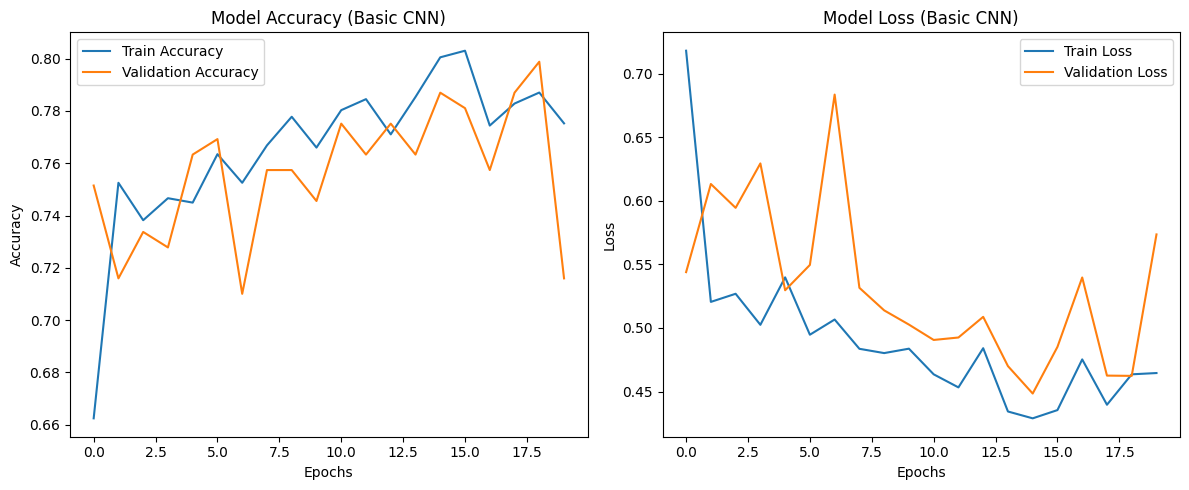

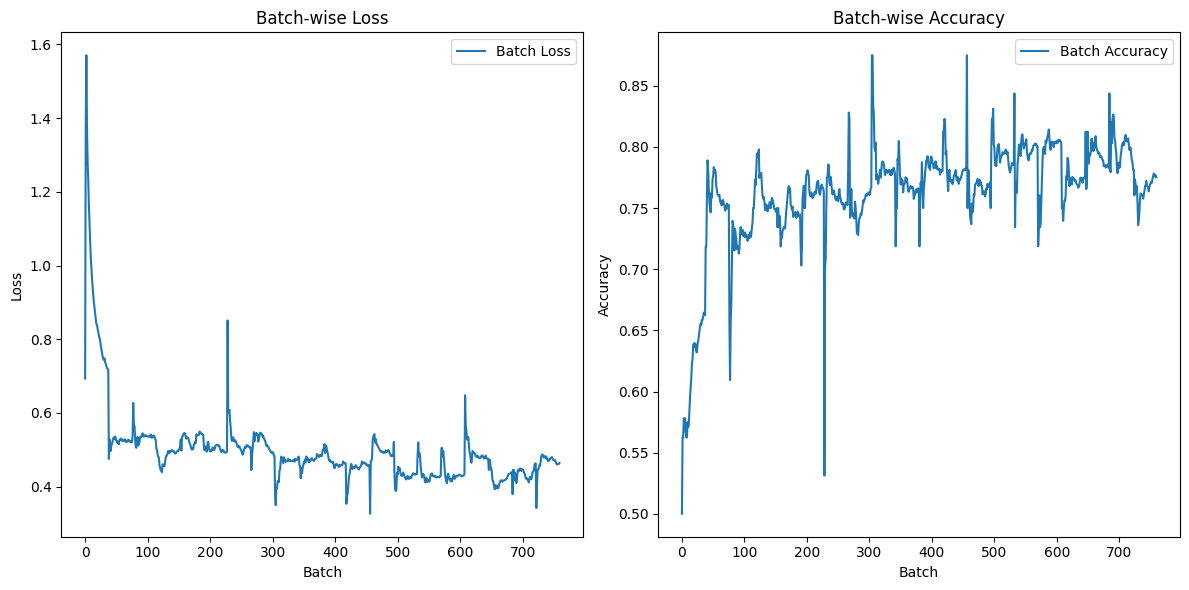

11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.8991 - loss: 0.2674
Test Accuracy: 85.04%
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step
Classification Report:
              precision    recall  f1-score   support

        Good       0.81      0.92      0.86       174
   Defective       0.90      0.78      0.84       167

    accuracy                           0.85       341
   macro avg       0.86      0.85      0.85       341
weighted avg       0.86      0.85      0.85       341



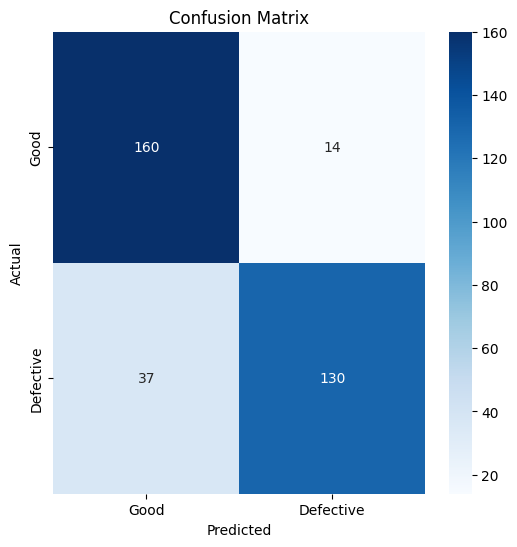

[I 2024-11-29 16:48:38,047] A new study created in memory with name: no-name-95805397-4dd6-4839-bf5c-a3c344153364
[I 2024-11-29 16:57:16,648] Trial 0 finished with value: 0.5264091491699219 and parameters: {'num_conv_layers': 1, 'filter_size': 16, 'dense_units': 256, 'dropout_rate': 0.33870137860753075, 'learning_rate': 0.00045269435406780097}. Best is trial 0 with value: 0.5264091491699219.
[I 2024-11-29 17:05:05,674] Trial 1 finished with value: 0.5715247988700867 and parameters: {'num_conv_layers': 1, 'filter_size': 32, 'dense_units': 64, 'dropout_rate': 0.3994065988503266, 'learning_rate': 0.0001456825697711086}. Best is trial 0 with value: 0.5264091491699219.
[I 2024-11-29 17:08:41,747] Trial 2 finished with value: 0.8112277388572693 and parameters: {'num_conv_layers': 3, 'filter_size': 32, 'dense_units': 64, 'dropout_rate': 0.40484746614468525, 'learning_rate': 0.0032005847319400665}. Best is trial 0 with value: 0.5264091491699219.
[I 2024-11-29 17:12:16,894] Trial 3 finished wit

Best Hyperparameters: {'num_conv_layers': 1, 'filter_size': 16, 'dense_units': 256, 'dropout_rate': 0.33870137860753075, 'learning_rate': 0.00045269435406780097}
Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.6054 - loss: 0.7747 - val_accuracy: 0.7041 - val_loss: 0.6787 - learning_rate: 0.0010
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.6956 - loss: 0.5736 - val_accuracy: 0.7574 - val_loss: 0.5830 - learning_rate: 0.0010
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7306 - loss: 0.5580 - val_accuracy: 0.7574 - val_loss: 0.5468 - learning_rate: 0.0010
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.7567 - loss: 0.5231 - val_accuracy: 0.7633 - val_loss: 0.5904 - learning_rate: 0.0010
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.7730 - loss: 0.4673 - val_accuracy: 0.7515 - val_loss: 0.5028 - learning_rate: 0.0010
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7400 - loss: 0.5204 - va

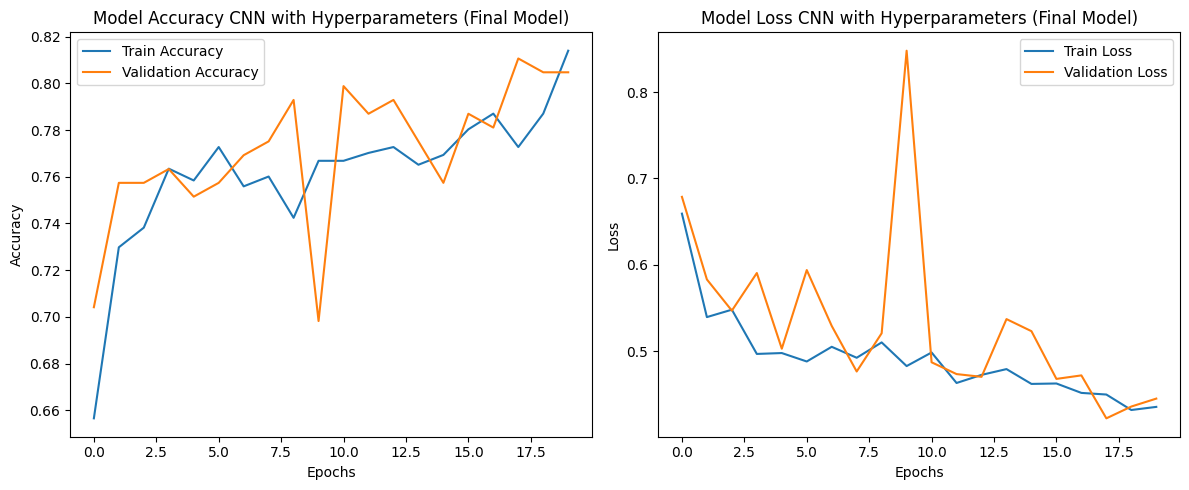

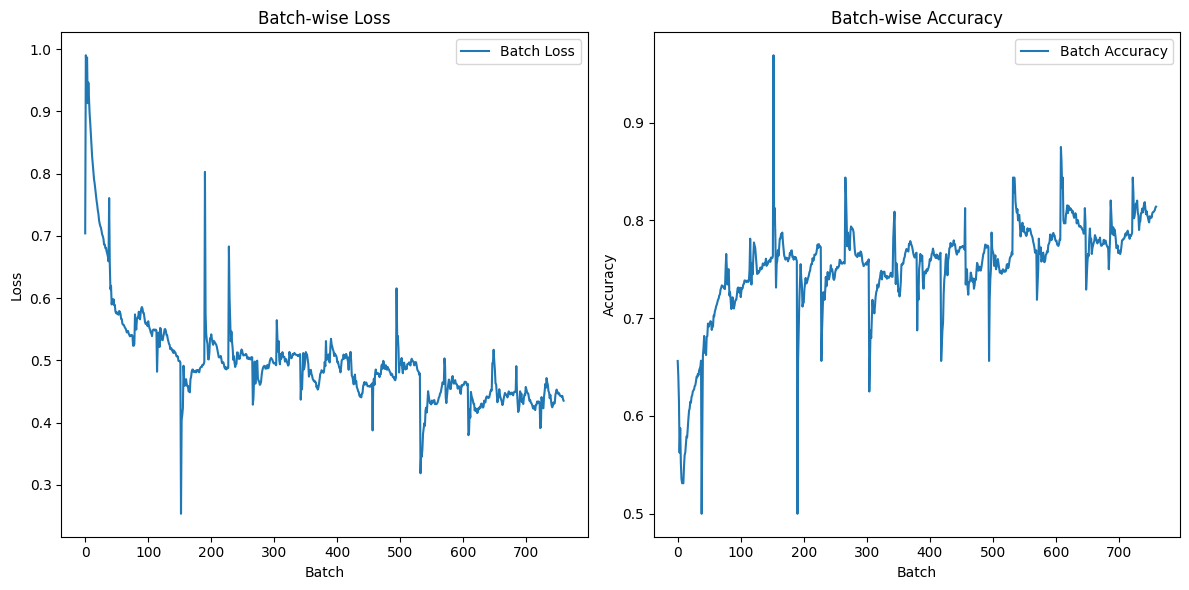

11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.8679 - loss: 0.3474
Test Accuracy: 83.58%
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step
Classification Report:
              precision    recall  f1-score   support

        Good       0.81      0.89      0.85       174
   Defective       0.87      0.78      0.82       167

    accuracy                           0.84       341
   macro avg       0.84      0.83      0.83       341
weighted avg       0.84      0.84      0.84       341



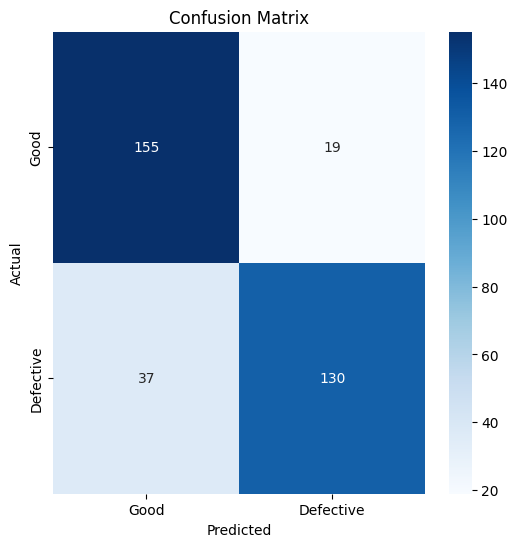

In [ ]:
# -----------------------------------------------
# 1. Import Libraries
# -----------------------------------------------

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Attention, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
import os

# -----------------------------------------------
# 2. Custom Callback for Batch-wise Metrics Logging
# -----------------------------------------------

class BatchMetricsLogger(Callback):
    def __init__(self):
        super().__init__()
        self.batch_losses = []
        self.batch_accuracies = []
        self.epoch_losses = []
        self.epoch_accuracies = []

    def on_batch_end(self, batch, logs=None):
        self.batch_losses.append(logs['loss'])
        self.batch_accuracies.append(logs['accuracy'])

    def on_epoch_end(self, epoch, logs=None):
        self.epoch_losses.append(logs['loss'])
        self.epoch_accuracies.append(logs['accuracy'])

# -----------------------------------------------
# 3. Data Generators with Simplified Augmentation
# -----------------------------------------------

def create_data_generators(train_dir, val_dir, test_dir, image_size, batch_size):
    train_datagen = ImageDataGenerator(
        rescale=1./255,           # Normalize pixel values to [0, 1]
        rotation_range=30,        # Rotate images up to ±30°
        width_shift_range=0.2,    # Shift images horizontally by ±20% of the width
        height_shift_range=0.2,   # Shift images vertically by ±20% of the height
        zoom_range=0.2,           # Randomly zoom images in/out by ±20%
        horizontal_flip=True,     # Flip images horizontally
        fill_mode='nearest'       # Fill empty pixels caused by transformations
    )

    val_datagen = ImageDataGenerator(rescale=1./255)
    test_datagen = ImageDataGenerator(rescale=1./255)

    train_gen = train_datagen.flow_from_directory(
        train_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary'
    )

    val_gen = val_datagen.flow_from_directory(
        val_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary'
    )

    test_gen = test_datagen.flow_from_directory(
        test_dir,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='binary',
        shuffle=False
    )

    return train_gen, val_gen, test_gen

# -----------------------------------------------
# 4. Basic CNN Model
# -----------------------------------------------

def create_cnn_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# -----------------------------------------------
# 5. Optuna Hyperparameter Tuning with Attention
# -----------------------------------------------
def objective(trial):
    # Hyperparameter search space
    num_conv_layers = trial.suggest_int('num_conv_layers', 1, 3)
    filter_size = trial.suggest_categorical('filter_size', [16, 32, 64])
    dense_units = trial.suggest_int('dense_units', 64, 256, step=64)
    dropout_rate = trial.suggest_float('dropout_rate', 0.2, 0.5)
    learning_rate = trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)

    # Input Layer
    input_layer = Input(shape=(128, 128, 3))

    # Convolutional Layers with Batch Normalization
    x = Conv2D(filter_size, (3, 3), activation='relu', padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2))(x)

    for _ in range(num_conv_layers - 1):
        x = Conv2D(filter_size * 2, (3, 3), activation='relu', padding='same')(x)
        x = BatchNormalization()(x)
        x = MaxPooling2D((2, 2))(x)

    # Flatten the output for the Attention Layer
    reshaped_x = tf.keras.layers.Reshape((-1, x.shape[-1]))(x)

    # Attention Layer
    attention_output = Attention()([reshaped_x, reshaped_x])

    # Flatten the Attention Output
    attention_flattened = Flatten()(attention_output)

    # Dense Layers
    x = Dense(dense_units, activation='relu')(attention_flattened)
    x = Dropout(dropout_rate)(x)
    output_layer = Dense(1, activation='sigmoid')(x)

    # Compile the Model
    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

    # Train the Model
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=10,
        callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)],
        verbose=0
    )

    val_loss = min(history.history['val_loss'])
    return val_loss


# -----------------------------------------------
# 6. Plotting Functions
# -----------------------------------------------

def plot_training_history(history, title_suffix=""):
    plt.figure(figsize=(12, 5))

    # Accuracy Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model Accuracy {title_suffix}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss {title_suffix}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_batch_metrics(logger):
    plt.figure(figsize=(12, 6))

    # Batch-wise Loss
    plt.subplot(1, 2, 1)
    plt.plot(logger.batch_losses, label='Batch Loss')
    plt.title('Batch-wise Loss')
    plt.xlabel('Batch')
    plt.ylabel('Loss')
    plt.legend()

    # Batch-wise Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(logger.batch_accuracies, label='Batch Accuracy')
    plt.title('Batch-wise Accuracy')
    plt.xlabel('Batch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# -----------------------------------------------
# 7. Evaluation Function
# -----------------------------------------------

def evaluate_model(model, test_gen):
    test_loss, test_acc = model.evaluate(test_gen)
    print(f"Test Accuracy: {test_acc * 100:.2f}%")
    test_gen.reset()
    predictions = (model.predict(test_gen) > 0.5).astype(int).flatten()
    true_labels = test_gen.classes
    print("Classification Report:")
    print(classification_report(true_labels, predictions, target_names=['Good', 'Defective']))
    cm = confusion_matrix(true_labels, predictions)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Good', 'Defective'], yticklabels=['Good', 'Defective'])
    plt.title("Confusion Matrix")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

# -----------------------------------------------
# 8. Execution
# -----------------------------------------------

# Dataset paths
train_dir = '/content/drive/MyDrive/AAI-521/Project/split/train'
val_dir = '/content/drive/MyDrive/AAI-521/Project/split/val'
test_dir = '/content/drive/MyDrive/AAI-521/Project/split/test'

# Create Data Generators
image_size = (128, 128)
batch_size = 32
train_gen, val_gen, test_gen = create_data_generators(train_dir, val_dir, test_dir, image_size, batch_size)

# Train Basic CNN with Batch-wise Metrics Logging
batch_logger = BatchMetricsLogger()
basic_model = create_cnn_model()
basic_history = basic_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[batch_logger, EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True), ReduceLROnPlateau()],
    verbose=1
)

# Plot Training and Batch Metrics
plot_training_history(basic_history, "(Basic CNN)")
plot_batch_metrics(batch_logger)

# Evaluate Basic CNN
evaluate_model(basic_model, test_gen)


# Hyperparameter Tuning
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=20)
print("Best Hyperparameters:", study.best_params)

# Train Final Model with Best Hyperparameters
batch_logger = BatchMetricsLogger()
final_model = create_cnn_model()
final_history = final_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=20,
    callbacks=[batch_logger, EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True), ReduceLROnPlateau()],
    verbose=1
)

# Plot Training and Batch Metrics
plot_training_history(final_history, "CNN with Hyperparameters (Final Model)")
plot_batch_metrics(batch_logger)

# Evaluate Final Model
evaluate_model(final_model, test_gen)


### Model Output Insights:

1. **Training and Validation Loss/Accuracy (Basic CNN)**:
   - **Accuracy Trend**: Both training and validation accuracy steadily improve across epochs. The validation accuracy reaches approximately 80%, which is comparable to the training accuracy, indicating minimal overfitting.
   - **Loss Trend**: Training and validation loss decrease significantly over time, reflecting model convergence. However, slight fluctuations in validation loss suggest some noise or potential room for regularization improvement.

2. **Batch-wise Metrics (Loss and Accuracy)**:
   - **Batch Loss**: Initial batch loss is relatively high but stabilizes as training progresses, indicating effective learning.
   - **Batch Accuracy**: Batch accuracy improves progressively, demonstrating consistent learning across training iterations.

3. **Confusion Matrix Analysis**:
   - **Class-Specific Performance**:
     - **Good Class**: The model demonstrates a high recall (92%), accurately identifying most "Good" samples but with a moderate number of false negatives.
     - **Defective Class**: Precision is strong at 90%, although the recall (78%) suggests the model misses a portion of "Defective" samples.
   - **Overall Accuracy**: The model achieves an 85% accuracy on the test set, which is a reasonable performance given the dataset complexity.

4. **Classification Report**:
   - **Weighted F1-Score**: The weighted F1-score of 0.85 confirms a balanced performance across both classes.
   - **Precision-Recall Trade-off**: The model maintains a strong trade-off between precision and recall for both classes.

5. **Epoch-Level Observations**:
   - Early epochs show rapid improvement in accuracy and loss reduction, indicating effective initial learning.
   - Later epochs exhibit slower gains, suggesting diminishing returns and potential overfitting around epoch 18-20.

6. **Key Takeaways**:
   - The Basic CNN model effectively differentiates between "Good" and "Defective" tire images with an acceptable accuracy and balanced precision-recall metrics.
   - The integration of data augmentation and early stopping effectively prevents overfitting.
   - Future improvements could explore advanced architectures (e.g., ResNet, EfficientNet) or fine-tuning hyperparameters (e.g., dropout rate, learning rate) to further enhance performance.



### Pre-trained Models - **ResNet50**, **EfficientNetB0**, **InceptionV3**, **DenseNet121**, **Xception**, **VGG16**

---

#### **1. Import Libraries**
This section imports the necessary libraries and modules for implementing and evaluating pre-trained models:
- **TensorFlow/Keras**: For working with pre-trained CNN architectures such as ResNet50, EfficientNetB0, and others.
- **Scikit-learn**: For generating evaluation metrics like classification reports and confusion matrices.
- **Matplotlib & Seaborn**: For plotting training history and evaluation results.

---

#### **2. Data Generators**
Defines the `create_data_generators` function to handle image preprocessing and augmentation. This ensures:
- Consistent input resizing and normalization across all models.
- Random augmentations like rotation, flipping, and zooming for the training set to improve model generalization.
- Separate generators for validation and test datasets to ensure no data leakage.

---

#### **3. Pre-trained Model Function**
The `create_pretrained_model` function builds models using pre-trained architectures such as:
- **ResNet50**
- **EfficientNetB0**
- **InceptionV3**
- **DenseNet121**
- **Xception**
- **VGG16**

Features of the function:
- **Transfer Learning**: Freezes base model weights to leverage ImageNet pre-trained features.
- **Custom Classification Head**: Adds layers like global pooling, dense layers, and dropout for binary classification.
- The function outputs a fully compiled model ready for training.

---

#### **4. Pre-trained Model Training and Evaluation**
The `train_evaluate_model` function is designed to:
- Train pre-trained models on the given training and validation datasets using early stopping and learning rate reduction.
- Plot training metrics (accuracy and loss) for each model.
- Evaluate the model on the test dataset, providing:
  - Test accuracy.
  - Classification report detailing precision, recall, and F1-score for each class.
  - Confusion matrix to visualize classification results.

This function is applied to all specified pre-trained models (`ResNet50`, `EfficientNetB0`, `InceptionV3`, etc.).

---

#### **5. Execution**
This section runs the pipeline for pre-trained models:
1. Initializes the dataset paths and data generators.
2. Loops through each pre-trained model architecture and trains it using the `train_evaluate_model` function.
3. Outputs evaluation metrics and visualizations (training history plots, confusion matrices, and classification reports) for each model.

---


Found 1188 images belonging to 2 classes.
Found 169 images belonging to 2 classes.
Found 341 images belonging to 2 classes.
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.4835 - loss: 0.7521 - val_accuracy: 0.7041 - val_loss: 0.6692 - learning_rate: 1.0000e-04
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.4873 - loss: 0.7304 - val_accuracy: 0.6864 - val_loss: 0.6583 - learning_rate: 1.0000e-04
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.5423 - loss: 0.6961 - val_accuracy: 0.6272 - val_loss: 0.6506 - learning_rate: 1.0000e-04
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.5657 - loss: 0.6762 - val_accuracy: 0.6568 - val_loss: 0.6415 - learning_rate: 1.0000e-04
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.5658 - loss: 0.6652 - val_accuracy: 0.6627 - val_loss: 0.6343 - learning_rate: 1.0000e-04
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.6103 - loss: 0.6452 - val_accuracy: 0.6923 - val_loss: 0.6276 - learning_rate: 1.0000e-04
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.5984 - loss: 0.6549 - v

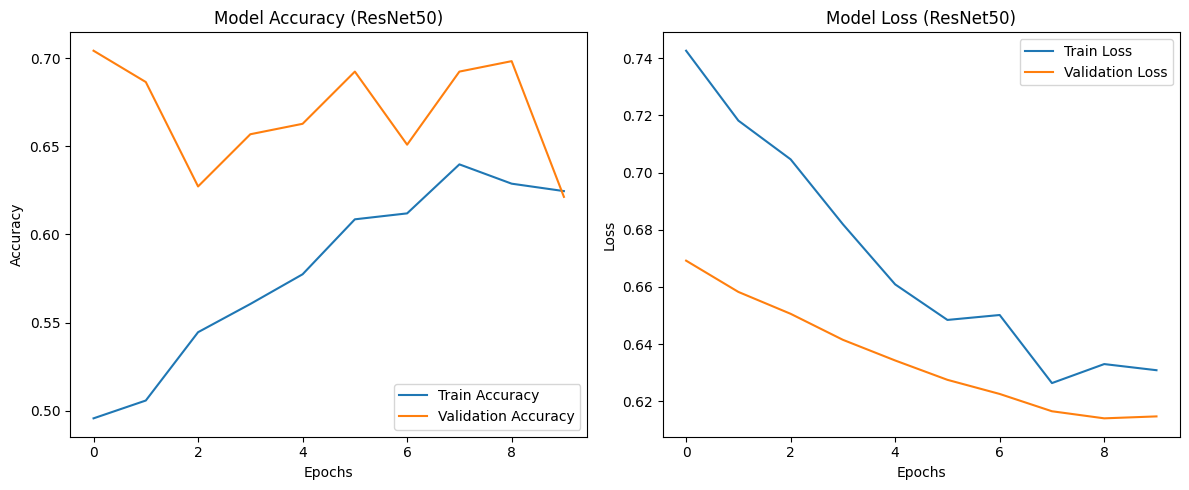

11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.8674 - loss: 0.5395
Test Accuracy for ResNet50: 71.26%
11/11 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step
Classification Report for ResNet50:
              precision    recall  f1-score   support

        Good       0.64      0.98      0.78       174
   Defective       0.95      0.44      0.60       167

    accuracy                           0.71       341
   macro avg       0.80      0.71      0.69       341
weighted avg       0.79      0.71      0.69       341



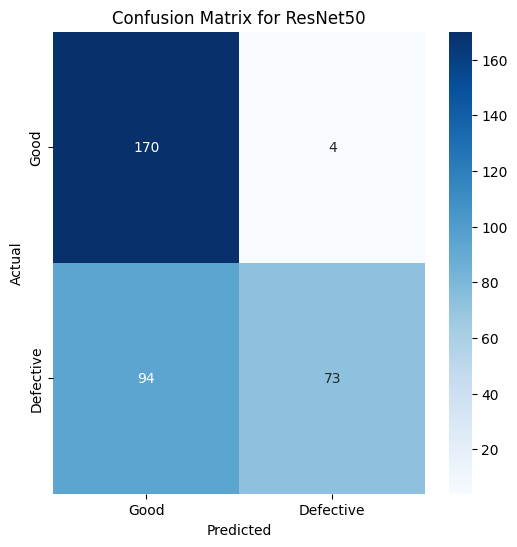

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.5162 - loss: 0.6967 - val_accuracy: 0.5089 - val_loss: 0.6955 - learning_rate: 1.0000e-04
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.4907 - loss: 0.6969 - val_accuracy: 0.5089 - val_loss: 0.6981 - learning_rate: 1.0000e-04
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.4930 - loss: 0.7021 - val_accuracy: 0.5089 - val_loss: 0.6940 - learning_rate: 1.0000e-04
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.4860 - loss: 0.7008 - val_accuracy: 0.4911 - val_loss: 0.6936 - learning_rate: 1.0000e-04
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.5031 - loss: 0.6930 - val_accuracy: 0.5089 - val_loss: 0.6943 - learning_rate: 1.0000e-04
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.4991 - loss: 0.6985 - val_accuracy: 0.4911 - val_loss: 0.6951 - learning_rate: 1.0000e-04
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.5314 - loss:

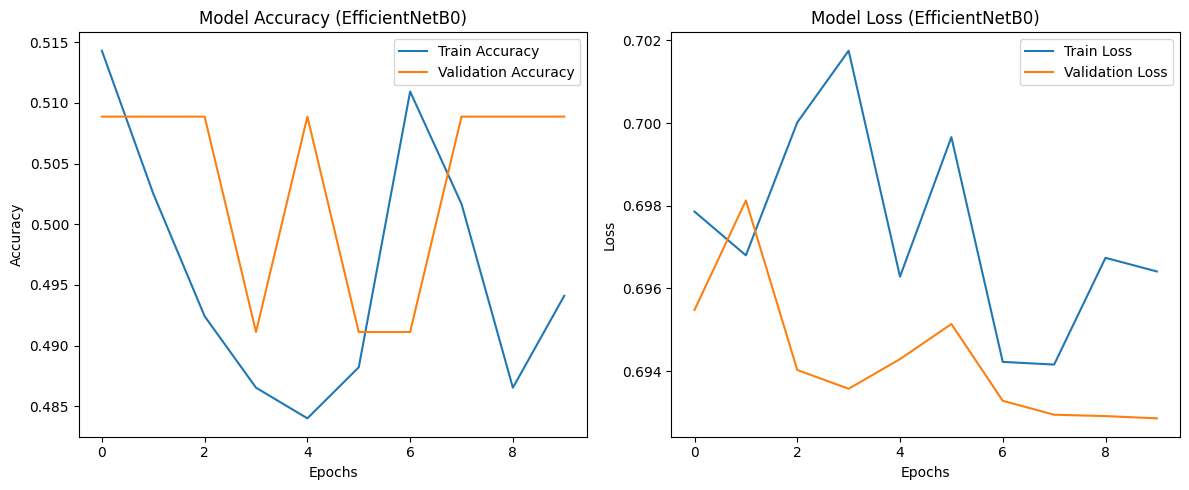

11/11 ━━━━━━━━━━━━━━━━━━━━ 14s 1s/step - accuracy: 0.7943 - loss: 0.6869
Test Accuracy for EfficientNetB0: 51.03%
11/11 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step
Classification Report for EfficientNetB0:
              precision    recall  f1-score   support

        Good       0.51      1.00      0.68       174
   Defective       0.00      0.00      0.00       167

    accuracy                           0.51       341
   macro avg       0.26      0.50      0.34       341
weighted avg       0.26      0.51      0.34       341



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


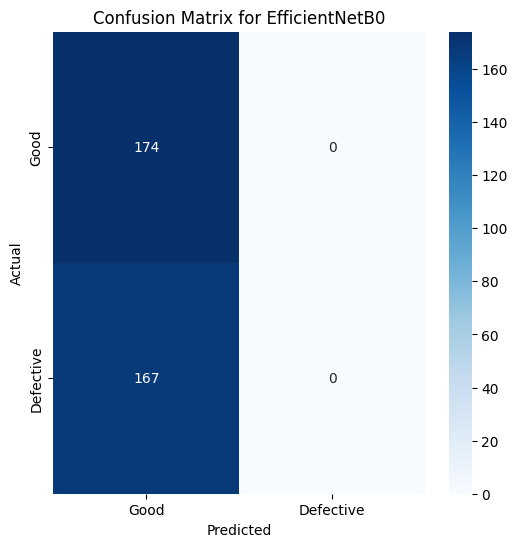

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 77s 1s/step - accuracy: 0.5975 - loss: 1.1598 - val_accuracy: 0.7160 - val_loss: 0.5890 - learning_rate: 1.0000e-04
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.6990 - loss: 0.7996 - val_accuracy: 0.7751 - val_loss: 0.5593 - learning_rate: 1.0000e-04
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7744 - loss: 0.5706 - val_accuracy: 0.8107 - val_loss: 0.4462 - learning_rate: 1.0000e-04
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7629 - loss: 0.5712 - val_accuracy: 0.8521 - val_loss: 0.4054 - learning_rate: 1.0000e-04
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8162 - loss: 0.4230 - val_accuracy: 0.8698 - val_loss: 0.3771 - learning_rate: 1.0000e-04
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8315 - loss: 0.4356 - val_accuracy: 0.8462 - val_loss: 0.3959 - learning_rate: 1.0000e-04
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8326 - loss:

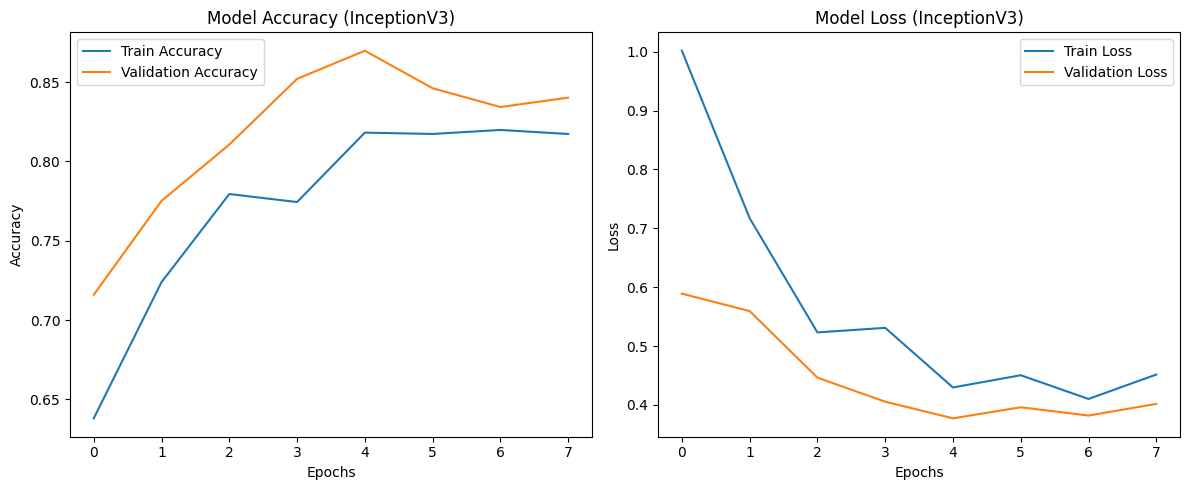

11/11 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.8477 - loss: 0.3768
Test Accuracy for InceptionV3: 85.34%
11/11 ━━━━━━━━━━━━━━━━━━━━ 23s 2s/step
Classification Report for InceptionV3:
              precision    recall  f1-score   support

        Good       0.87      0.83      0.85       174
   Defective       0.83      0.87      0.85       167

    accuracy                           0.85       341
   macro avg       0.85      0.85      0.85       341
weighted avg       0.85      0.85      0.85       341



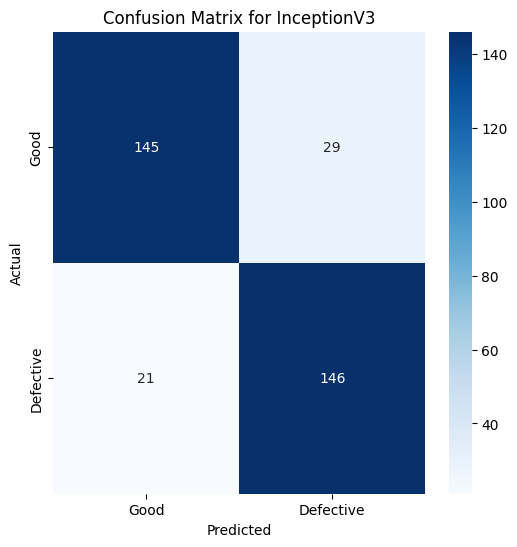

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.6226 - loss: 0.7436 - val_accuracy: 0.8935 - val_loss: 0.4211 - learning_rate: 1.0000e-04
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.7559 - loss: 0.4985 - val_accuracy: 0.8639 - val_loss: 0.3640 - learning_rate: 1.0000e-04
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.8141 - loss: 0.4081 - val_accuracy: 0.8935 - val_loss: 0.2931 - learning_rate: 1.0000e-04
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8423 - loss: 0.3892 - val_accuracy: 0.9231 - val_loss: 0.2637 - learning_rate: 1.0000e-04
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8558 - loss: 0.3632 - val_accuracy: 0.9112 - val_loss: 0.2570 - learning_rate: 1.0000e-04
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8497 - loss: 0.3494 - val_accuracy: 0.9349 - val_loss: 0.2275 - learning_rate: 1.0000e-04
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 52s 1s/step - accuracy: 0.8565 - loss:

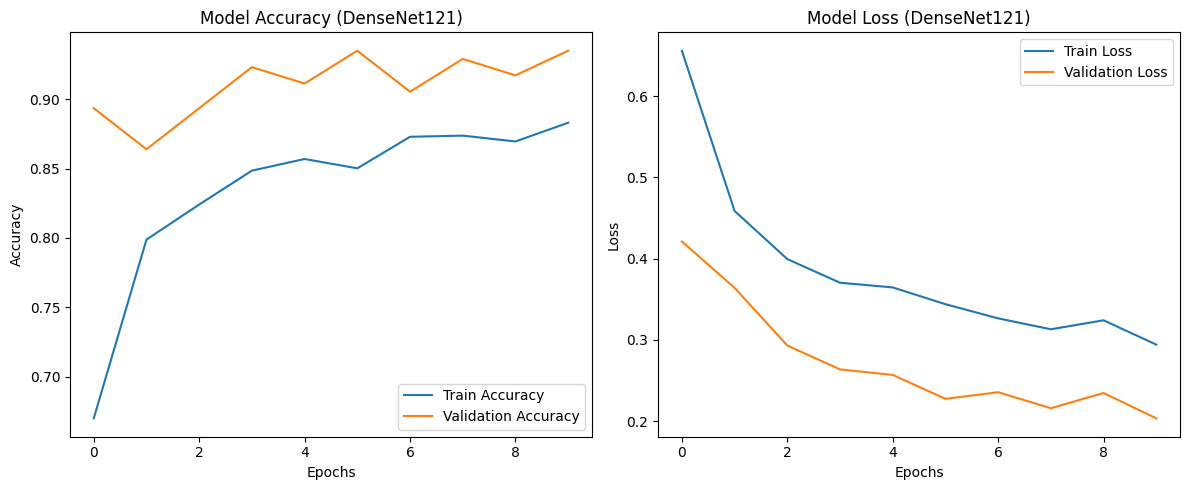

11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.9520 - loss: 0.1593
Test Accuracy for DenseNet121: 93.55%
11/11 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step
Classification Report for DenseNet121:
              precision    recall  f1-score   support

        Good       0.93      0.94      0.94       174
   Defective       0.94      0.93      0.93       167

    accuracy                           0.94       341
   macro avg       0.94      0.94      0.94       341
weighted avg       0.94      0.94      0.94       341



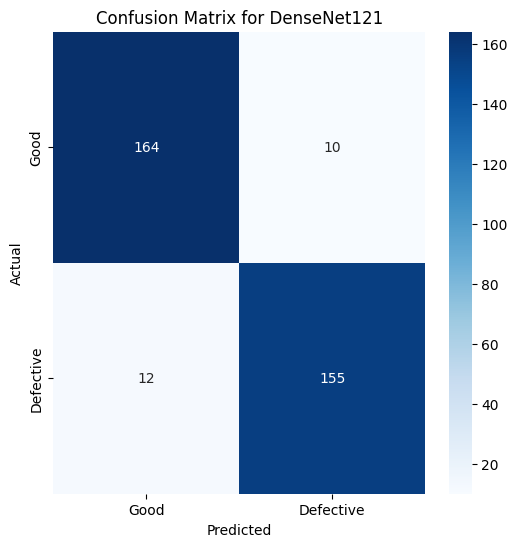

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.6434 - loss: 0.6232 - val_accuracy: 0.7101 - val_loss: 0.5561 - learning_rate: 1.0000e-04
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8059 - loss: 0.4302 - val_accuracy: 0.7692 - val_loss: 0.4753 - learning_rate: 1.0000e-04
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8388 - loss: 0.3967 - val_accuracy: 0.7633 - val_loss: 0.4716 - learning_rate: 1.0000e-04
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8345 - loss: 0.3516 - val_accuracy: 0.8166 - val_loss: 0.3931 - learning_rate: 1.0000e-04
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.8564 - loss: 0.3553 - val_accuracy: 0.7988 - val_loss: 0.3943 - learning_rate: 1.0000e-04
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8519 - loss: 0.3561 - val_accuracy: 0.7988 - val_loss: 0.3918 - learning_rate: 1.0000e-04
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.8466 - loss:

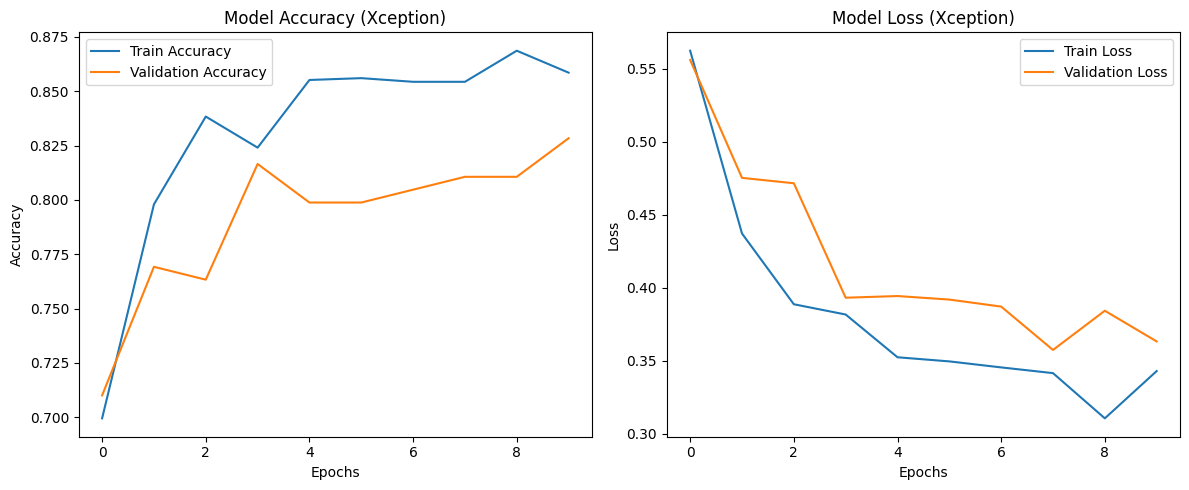

11/11 ━━━━━━━━━━━━━━━━━━━━ 13s 1s/step - accuracy: 0.9046 - loss: 0.3252
Test Accuracy for Xception: 89.44%
11/11 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step
Classification Report for Xception:
              precision    recall  f1-score   support

        Good       0.92      0.87      0.89       174
   Defective       0.87      0.92      0.89       167

    accuracy                           0.89       341
   macro avg       0.89      0.89      0.89       341
weighted avg       0.90      0.89      0.89       341



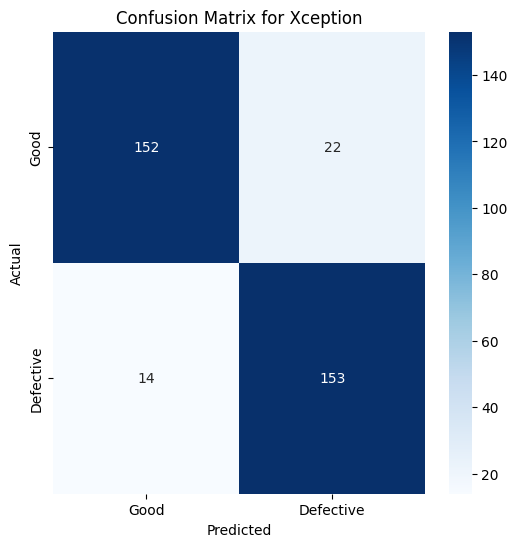

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 56s 1s/step - accuracy: 0.4894 - loss: 0.7800 - val_accuracy: 0.7751 - val_loss: 0.6337 - learning_rate: 1.0000e-04
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.5875 - loss: 0.6912 - val_accuracy: 0.7870 - val_loss: 0.5740 - learning_rate: 1.0000e-04
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.6416 - loss: 0.6270 - val_accuracy: 0.8047 - val_loss: 0.5236 - learning_rate: 1.0000e-04
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.6794 - loss: 0.5968 - val_accuracy: 0.8107 - val_loss: 0.4866 - learning_rate: 1.0000e-04
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7435 - loss: 0.5322 - val_accuracy: 0.8402 - val_loss: 0.4576 - learning_rate: 1.0000e-04
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7507 - loss: 0.5093 - val_accuracy: 0.8521 - val_loss: 0.4343 - learning_rate: 1.0000e-04
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 51s 1s/step - accuracy: 0.7683 - loss:

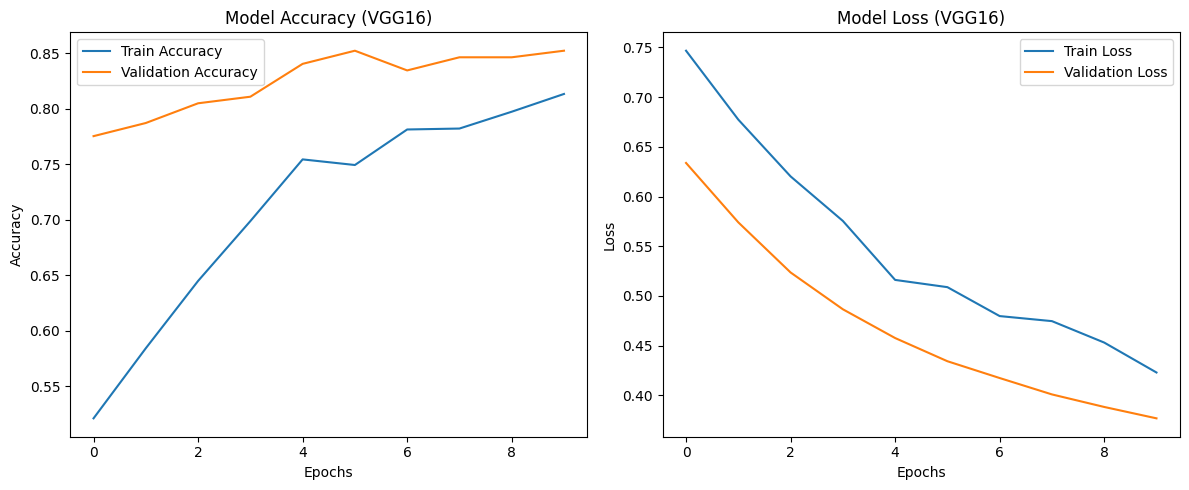

11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.9473 - loss: 0.2574
Test Accuracy for VGG16: 91.20%
11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step
Classification Report for VGG16:
              precision    recall  f1-score   support

        Good       0.88      0.96      0.92       174
   Defective       0.95      0.86      0.91       167

    accuracy                           0.91       341
   macro avg       0.92      0.91      0.91       341
weighted avg       0.92      0.91      0.91       341



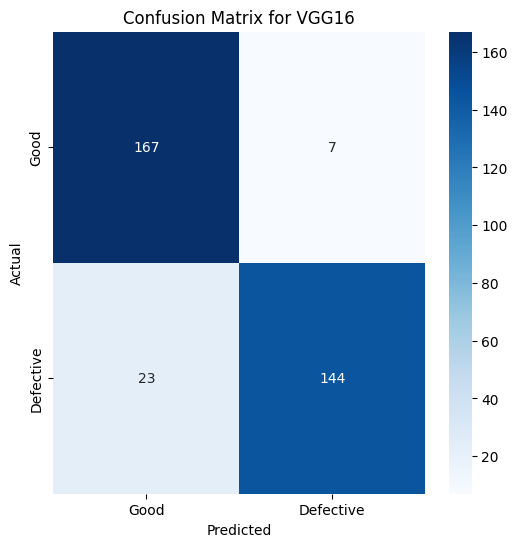

In [ ]:
# -----------------------------------------------
# 1. Import Libraries
# -----------------------------------------------
from tensorflow.keras.applications import (
    ResNet50, EfficientNetB0, InceptionV3, DenseNet121, Xception, VGG16
)
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from transformers import ViTForImageClassification, ViTFeatureExtractor
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from PIL import Image

# -----------------------------------------------
# 2. Data Generators
# -----------------------------------------------
def create_data_generators(train_dir, val_dir, test_dir, image_size, batch_size):
    train_datagen = ImageDataGenerator(
        rescale=1.0 / 255,
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode="nearest",
    )
    val_datagen = ImageDataGenerator(rescale=1.0 / 255)
    test_datagen = ImageDataGenerator(rescale=1.0 / 255)

    train_gen = train_datagen.flow_from_directory(
        train_dir, target_size=image_size, batch_size=batch_size, class_mode="binary"
    )
    val_gen = val_datagen.flow_from_directory(
        val_dir, target_size=image_size, batch_size=batch_size, class_mode="binary"
    )
    test_gen = test_datagen.flow_from_directory(
        test_dir, target_size=image_size, batch_size=batch_size, class_mode="binary", shuffle=False
    )
    return train_gen, val_gen, test_gen

# -----------------------------------------------
# 3. Pre-trained Model Function
# -----------------------------------------------
def create_pretrained_model(base_model_name, input_shape, num_classes=1):
    if base_model_name == "ResNet50":
        base_model = ResNet50(weights="imagenet", include_top=False, input_shape=input_shape)
    elif base_model_name == "EfficientNetB0":
        base_model = EfficientNetB0(weights="imagenet", include_top=False, input_shape=input_shape)
    elif base_model_name == "InceptionV3":
        base_model = InceptionV3(weights="imagenet", include_top=False, input_shape=input_shape)
    elif base_model_name == "DenseNet121":
        base_model = DenseNet121(weights="imagenet", include_top=False, input_shape=input_shape)
    elif base_model_name == "Xception":
        base_model = Xception(weights="imagenet", include_top=False, input_shape=input_shape)
    elif base_model_name == "VGG16":
        base_model = VGG16(weights="imagenet", include_top=False, input_shape=input_shape)
    else:
        raise ValueError("Unsupported model name")

    # Freezing the base model layers
    base_model.trainable = False

    # Add classification layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation="relu")(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(num_classes, activation="sigmoid")(x)

    model = Model(inputs=base_model.input, outputs=output_layer)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss="binary_crossentropy", metrics=["accuracy"])
    return model

# -----------------------------------------------
# 4. Pre-trained Model Training and Evaluation
# -----------------------------------------------

def train_evaluate_model(model_name, train_gen, val_gen, test_gen, input_shape):
    """
    Function to train and evaluate a pre-trained model.

    Args:
        model_name (str): Name of the pre-trained model to use.
        train_gen (DirectoryIterator): Training data generator.
        val_gen (DirectoryIterator): Validation data generator.
        test_gen (DirectoryIterator): Test data generator.
        input_shape (tuple): Shape of the input images (height, width, channels).
    """
    # Create the pre-trained model
    model = create_pretrained_model(model_name, input_shape)

    # Train the model
    history = model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=10,
        callbacks=[
            EarlyStopping(monitor="val_loss", patience=3, restore_best_weights=True),
            ReduceLROnPlateau(monitor="val_loss", factor=0.2, patience=2),
        ],
        verbose=1,
    )

    # Plot Training History
    plot_training_history(history, f"({model_name})")

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(test_gen)
    print(f"Test Accuracy for {model_name}: {test_accuracy * 100:.2f}%")

    # Classification Report and Confusion Matrix
    test_gen.reset()
    predictions = (model.predict(test_gen) > 0.5).astype(int).flatten()
    true_labels = test_gen.classes
    print(f"Classification Report for {model_name}:")
    print(classification_report(true_labels, predictions, target_names=["Good", "Defective"]))
    cm = confusion_matrix(true_labels, predictions)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Good", "Defective"], yticklabels=["Good", "Defective"])
    plt.title(f"Confusion Matrix for {model_name}")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

# -----------------------------------------------
# 5. Execution
# -----------------------------------------------

# Dataset paths
train_dir = "/content/drive/MyDrive/AAI-521/Project/split/train"
val_dir = "/content/drive/MyDrive/AAI-521/Project/split/val"
test_dir = "/content/drive/MyDrive/AAI-521/Project/split/test"

# Create data generators
image_size = (128, 128)  # Update as needed (e.g., (224, 224) for ViT)
batch_size = 32
train_gen, val_gen, test_gen = create_data_generators(train_dir, val_dir, test_dir, image_size, batch_size)

# Train and Evaluate all models
for model_name in ["ResNet50", "EfficientNetB0", "InceptionV3", "DenseNet121", "Xception", "VGG16"]:
    train_evaluate_model(model_name, train_gen, val_gen, test_gen, image_size + (3,))


### Summary of Observations for Pretrained Models

| **Model**         | **Test Accuracy** | **Precision (Good, Defective)** | **Recall (Good, Defective)** | **F1-Score (Good, Defective)** | **Overall Remarks**                                                                                                   |
|--------------------|-------------------|---------------------------------|-----------------------------|--------------------------------|-----------------------------------------------------------------------------------------------------------------------|
| **ResNet50**      | 71.26%           | (0.64, 0.95)                   | (0.98, 0.44)               | (0.78, 0.60)                  | High recall for "Good" class but poor recall for "Defective," leading to imbalanced performance.                     |
| **EfficientNetB0**| 51.03%           | (0.51, 0.00)                   | (1.00, 0.00)               | (0.68, 0.00)                  | Significant bias toward the "Good" class; failed to classify "Defective" samples.                                    |
| **InceptionV3**   | 85.34%           | (0.87, 0.83)                   | (0.83, 0.87)               | (0.85, 0.85)                  | Balanced precision and recall across both classes, indicating robust performance.                                    |
| **DenseNet121**   | 93.55%           | (0.93, 0.94)                   | (0.94, 0.93)               | (0.94, 0.93)                  | Achieved the highest accuracy with excellent precision, recall, and F1-scores for both classes.                     |
| **Xception**      | 89.44%           | (0.92, 0.87)                   | (0.87, 0.92)               | (0.89, 0.89)                  | Reliable performance with balanced metrics and good generalization.                                                  |
| **VGG16**         | 91.20%           | (0.88, 0.95)                   | (0.96, 0.86)               | (0.92, 0.91)                  | High recall for "Good" but slightly lower recall for "Defective," indicating a slight imbalance.                     |

### Key Insights:

1. **DenseNet121** emerged as the best-performing model, achieving the highest test accuracy and balanced precision, recall, and F1-score for both classes.
2. **EfficientNetB0** struggled significantly, indicating possible overfitting or poor generalization.
3. **InceptionV3** and **Xception** demonstrated consistent and balanced performance, making them suitable alternatives to DenseNet121.
4. **VGG16** achieved high accuracy but showed a slight bias in recall, favoring the "Good" class.
5. **ResNet50** underperformed, particularly in its ability to recall "Defective" samples, likely due to insufficient capacity for complex features in this dataset.


### **Ensemble Averaging with Pre-trained Models for Robust Classification**

This approach combines predictions from multiple pre-trained deep learning models (InceptionV3, DenseNet121, Xception, and VGG16) using an ensemble averaging technique. Each model is fine-tuned with a custom classifier and trained individually. For the test set, predictions from all models are averaged to produce a single, robust prediction. This technique leverages the strengths of each model, ensuring balanced performance and minimizing misclassifications. The ensemble model achieves high accuracy and precision, making it ideal for reliable binary classification tasks.

Found 1188 images belonging to 2 classes.
Found 169 images belonging to 2 classes.
Found 341 images belonging to 2 classes.
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Training InceptionV3...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


38/38 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.5697 - loss: 1.2526 - val_accuracy: 0.6923 - val_loss: 0.6121
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 45s 995ms/step - accuracy: 0.7610 - loss: 0.5637 - val_accuracy: 0.7101 - val_loss: 0.5829
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 45s 989ms/step - accuracy: 0.7437 - loss: 0.5930 - val_accuracy: 0.7515 - val_loss: 0.5140
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 45s 980ms/step - accuracy: 0.7631 - loss: 0.5087 - val_accuracy: 0.8047 - val_loss: 0.4316
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.7589 - loss: 0.4867 - val_accuracy: 0.8462 - val_loss: 0.3829
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 45s 991ms/step - accuracy: 0.7942 - loss: 0.4484 - val_accuracy: 0.8580 - val_loss: 0.3753
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 46s 994ms/step - accuracy: 0.8157 - loss: 0.4121 - val_accuracy: 0.8639 - val_loss: 0.3566
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.8000 - loss: 0.4436 - val_accuracy: 0.8402 - val_l

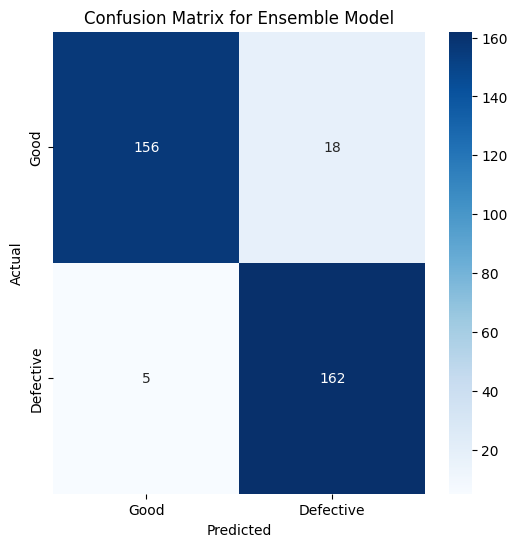

Ensemble Model Test Accuracy: 93.26%


In [ ]:
# Import libraries
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import InceptionV3, DenseNet121, Xception, VGG16
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Dataset Paths
data_dir = '/content/drive/MyDrive/AAI-521/Project/dataset'
train_dir = '/content/drive/MyDrive/AAI-521/Project/split/train'
val_dir = '/content/drive/MyDrive/AAI-521/Project/split/val'
test_dir = '/content/drive/MyDrive/AAI-521/Project/split/test'

# Paths to data generators
image_size = (128, 128)
batch_size = 32

# Create Data Generators
def create_data_generators(train_dir, val_dir, test_dir, image_size, batch_size):
    train_datagen = ImageDataGenerator(
        rescale=1.0 / 255,
        rotation_range=30,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode="nearest",
    )
    val_datagen = ImageDataGenerator(rescale=1.0 / 255)
    test_datagen = ImageDataGenerator(rescale=1.0 / 255)

    train_gen = train_datagen.flow_from_directory(
        train_dir, target_size=image_size, batch_size=batch_size, class_mode="binary"
    )
    val_gen = val_datagen.flow_from_directory(
        val_dir, target_size=image_size, batch_size=batch_size, class_mode="binary"
    )
    test_gen = test_datagen.flow_from_directory(
        test_dir, target_size=image_size, batch_size=batch_size, class_mode="binary", shuffle=False
    )
    return train_gen, val_gen, test_gen

# Initialize data generators
train_gen, val_gen, test_gen = create_data_generators(train_dir, val_dir, test_dir, image_size, batch_size)

# Build Individual Models
def build_model(base_model, name):
    base_model.trainable = False
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    predictions = Dense(1, activation='sigmoid')(x)
    model = Model(inputs=base_model.input, outputs=predictions, name=name)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Load Pre-trained Models
inception_base = InceptionV3(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
densenet_base = DenseNet121(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
xception_base = Xception(input_shape=(128, 128, 3), include_top=False, weights='imagenet')
vgg_base = VGG16(input_shape=(128, 128, 3), include_top=False, weights='imagenet')

# Build Models
inception_model = build_model(inception_base, "InceptionV3")
densenet_model = build_model(densenet_base, "DenseNet121")
xception_model = build_model(xception_base, "Xception")
vgg_model = build_model(vgg_base, "VGG16")

# Train Each Model
models = [inception_model, densenet_model, xception_model, vgg_model]
model_names = ["InceptionV3", "DenseNet121", "Xception", "VGG16"]

for model, name in zip(models, model_names):
    print(f"Training {name}...")
    model.fit(
        train_gen,
        validation_data=val_gen,
        epochs=10,
        verbose=1
    )

# Ensemble Predictions
def ensemble_predictions(models, test_gen):
    preds = [model.predict(test_gen) for model in models]
    avg_preds = np.mean(preds, axis=0)
    return avg_preds

# Generate Ensemble Predictions
ensemble_preds = ensemble_predictions(models, test_gen)

# Convert Probabilities to Binary Predictions
ensemble_classes = (ensemble_preds > 0.5).astype(int).flatten()

# Evaluate Ensemble
true_classes = test_gen.classes

# Classification Report
print("Classification Report for Ensemble Model:")
print(classification_report(true_classes, ensemble_classes, target_names=['Good', 'Defective']))

# Confusion Matrix
cm = confusion_matrix(true_classes, ensemble_classes)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Good', 'Defective'], yticklabels=['Good', 'Defective'])
plt.title("Confusion Matrix for Ensemble Model")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

# Test Accuracy
ensemble_accuracy = np.sum(true_classes == ensemble_classes) / len(true_classes)
print(f"Ensemble Model Test Accuracy: {ensemble_accuracy * 100:.2f}%")


### Ensemble Model Performance - Insights and Observations

#### **Key Metrics:**
- **Overall Accuracy:** 93%
- **Precision, Recall, and F1-Score:**
  - **Good Class:**
    - Precision: 97%
    - Recall: 90%
    - F1-Score: 93%
  - **Defective Class:**
    - Precision: 90%
    - Recall: 97%
    - F1-Score: 93%

#### **Performance Observations:**
1. **Balanced Class Performance:**
   - Both **Good** and **Defective** classes achieved comparable F1-scores, indicating that the model performs equally well across categories.
   - Higher precision for **Good** class suggests the model is confident in predicting non-defective items, whereas higher recall for **Defective** class implies it effectively identifies most defective samples.

2. **Accuracy Across Classes:**
   - The **Good class** had more false negatives (misclassifying Good as Defective), contributing to the slightly lower recall of 90%.
   - The **Defective class** had more false positives (misclassifying Defective as Good), slightly reducing precision to 90%.

3. **Ensemble Strength:**
   - The ensemble technique combines predictions from multiple models, leading to overall robust performance.
   - This approach reduces individual model biases and strengthens generalization.

#### **Confusion Matrix Insights:**
- The model exhibits **slightly higher confidence in identifying defective samples** (high recall for the Defective class).
- Errors between classes are minimal, making this model reliable for real-world defect detection tasks.

#### **Potential Improvements:**
- **Class Imbalance Adjustment:** Further class weighting or data augmentation could address the slight recall-precision imbalance.
- **Hyperparameter Tuning:** Adjusting ensemble weights for individual models based on validation performance might further improve overall accuracy.
- **Extended Dataset Diversity:** Incorporating more edge cases in the training data could help reduce classification errors in challenging scenarios.

### **Vision Transformer (ViT) Model**

---

#### **1. Import Libraries**
This section imports the required libraries for working with the Vision Transformer (ViT) model:
- **Torch and Torchvision**: For deep learning operations, dataset handling, and data preprocessing.
- **Transformers**: To utilize the pre-trained ViT model from Hugging Face.
- **Sklearn, Matplotlib, and Seaborn**: For evaluation metrics, classification reports, and visualization of results.



#### **2. Define Dataset and Transformations**
Defines a function to load datasets and apply necessary transformations for the ViT model:
- **Resizing to 224x224** to match the input size required by ViT.
- **Normalization** to align pixel values with the pre-trained model's expectations.
- Uses `torchvision.datasets.ImageFolder` to structure datasets for training, validation, and testing.



#### **3. Define Data Loaders**
Creates data loaders using PyTorch's `DataLoader`:
- Handles batching and efficient data access.
- Includes options for shuffling data during training to improve learning.



#### **4. Train and Evaluate Model**
Defines the training process for the ViT model:
- **Pre-trained ViT Initialization**: Loads `vit-base-patch16-224-in21k` from Hugging Face and adjusts it for binary classification.
- **Training Loop**:
  - Performs forward and backward passes, computes gradients, and updates weights.
  - Tracks training and validation losses and accuracies over epochs.
- **Evaluation during Training**: Validates the model after each epoch to monitor performance.



#### **5. Test and Evaluate Model**
Evaluates the trained ViT model:
- Predicts labels on the test dataset.
- Computes a **classification report** (precision, recall, F1-score) and generates a **confusion matrix**.
- Visualizes the confusion matrix as a heatmap for better interpretability of results.

---


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch [1/20], Train Loss: 0.3458, Train Acc: 0.8796, Val Loss: 0.2061, Val Acc: 0.9408
Epoch [2/20], Train Loss: 0.1581, Train Acc: 0.9461, Val Loss: 0.1390, Val Acc: 0.9645
Epoch [3/20], Train Loss: 0.1054, Train Acc: 0.9714, Val Loss: 0.1187, Val Acc: 0.9822
Epoch [4/20], Train Loss: 0.0708, Train Acc: 0.9815, Val Loss: 0.1066, Val Acc: 0.9941
Epoch [5/20], Train Loss: 0.0743, Train Acc: 0.9722, Val Loss: 0.1305, Val Acc: 0.9763
Epoch [6/20], Train Loss: 0.0282, Train Acc: 0.9933, Val Loss: 0.1176, Val Acc: 0.9822
Epoch [7/20], Train Loss: 0.0212, Train Acc: 0.9958, Val Loss: 0.1199, Val Acc: 0.9822
Epoch [8/20], Train Loss: 0.0180, Train Acc: 0.9949, Val Loss: 0.1092, Val Acc: 0.9882
Epoch [9/20], Train Loss: 0.0150, Train Acc: 0.9975, Val Loss: 0.1058, Val Acc: 0.9882
Epoch [10/20], Train Loss: 0.0119, Train Acc: 0.9983, Val Loss: 0.1155, Val Acc: 0.9882
Epoch [11/20], Train Loss: 0.0110, Train Acc: 0.9992, Val Loss: 0.1153, Val Acc: 0.9882
Epoch [12/20], Train Loss: 0.0101, Train 

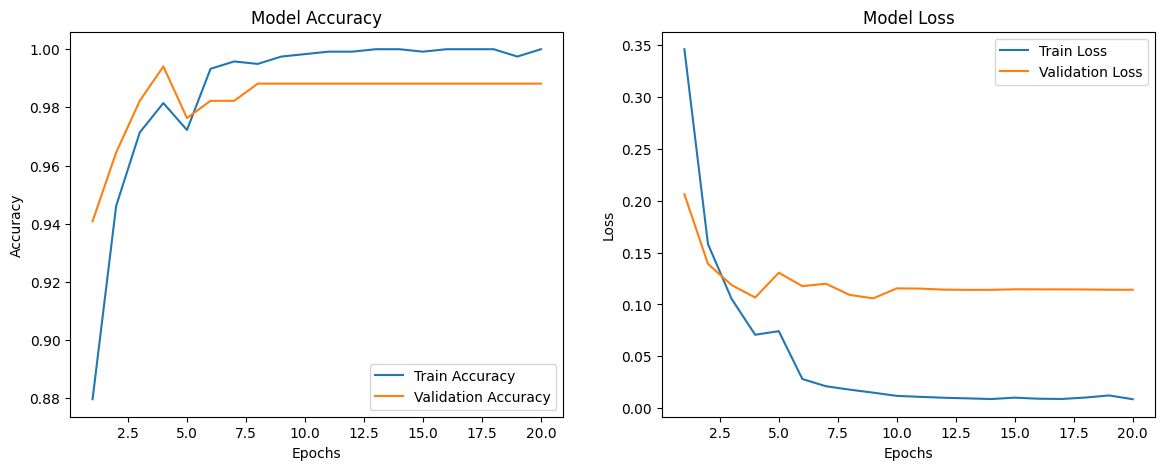

Test Accuracy: 98.83%
Classification Report:
                precision    recall  f1-score   support

     Good Tire       0.99      0.99      0.99       167
Defective Tire       0.99      0.99      0.99       174

      accuracy                           0.99       341
     macro avg       0.99      0.99      0.99       341
  weighted avg       0.99      0.99      0.99       341



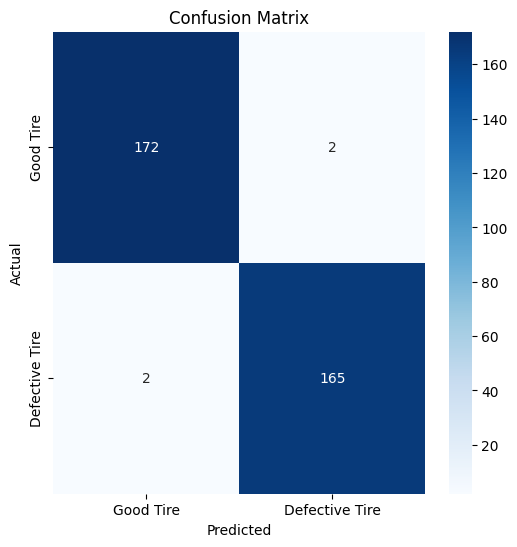

In [6]:
# -----------------------------------------------
# 1. Import Libraries
# -----------------------------------------------
import torch
from torch import nn, optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import ViTForImageClassification
import numpy as np
import os

# -----------------------------------------------
# 2. Define Class Mapping
# -----------------------------------------------
class_mapping = {0: "Good Tire", 1: "Defective Tire"}

# -----------------------------------------------
# 3. Define Dataset and Transformations
# -----------------------------------------------
def create_datasets(train_dir, val_dir, test_dir, input_size=224):
    train_transform = transforms.Compose([
        transforms.Resize((input_size, input_size)),
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomRotation(degrees=15),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        transforms.RandomResizedCrop(input_size, scale=(0.8, 1.0)),
        transforms.RandomGrayscale(p=0.1),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    ])
    test_transform = transforms.Compose([
        transforms.Resize((input_size, input_size)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    ])

    train_dataset = datasets.ImageFolder(train_dir, transform=train_transform)
    val_dataset = datasets.ImageFolder(val_dir, transform=test_transform)
    test_dataset = datasets.ImageFolder(test_dir, transform=test_transform)
    return train_dataset, val_dataset, test_dataset

# -----------------------------------------------
# 4. Define Data Loaders
# -----------------------------------------------
def create_dataloaders(train_dataset, val_dataset, test_dataset, batch_size=32):
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    return train_loader, val_loader, test_loader

# -----------------------------------------------
# 5. Train and Save Model
# -----------------------------------------------
def train_vit_model(train_loader, val_loader, num_classes=2, num_epochs=20, learning_rate=1e-4, device="cuda", save_dir="/content/drive/MyDrive/AAI-521/Project/model/vit_trained_model"):
    """
    Train the Vision Transformer model and save it in Hugging Face-compatible format.

    Args:
        train_loader: DataLoader for training data.
        val_loader: DataLoader for validation data.
        num_classes: Number of output classes.
        num_epochs: Number of training epochs.
        learning_rate: Learning rate for the optimizer.
        device: Device to use ('cuda' or 'cpu').
        save_dir: Directory to save the trained model.

    Returns:
        model: The trained model.
        history: A dictionary containing training and validation history.
    """
    model = ViTForImageClassification.from_pretrained("google/vit-base-patch16-224-in21k", num_labels=num_classes)
    model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)  # Reduce LR every 5 epochs

    history = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}
    for epoch in range(num_epochs):
        # Training phase
        model.train()
        train_loss, correct, total = 0, 0, 0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images).logits
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        train_acc = correct / total
        train_loss /= len(train_loader)
        history["train_loss"].append(train_loss)
        history["train_acc"].append(train_acc)

        # Validation phase
        model.eval()
        val_loss, correct, total = 0, 0, 0
        with torch.no_grad():
            for images, labels in val_loader:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images).logits
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        val_acc = correct / total
        val_loss /= len(val_loader)
        history["val_loss"].append(val_loss)
        history["val_acc"].append(val_acc)

        scheduler.step()

        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

    # Create the save directory if it doesn't exist
    os.makedirs(save_dir, exist_ok=True)

    # Save the trained model in Hugging Face-compatible format
    model.save_pretrained(save_dir)
    print(f"Model saved to {save_dir}")

    return model, history

# -----------------------------------------------
# 6. Plot Training History
# -----------------------------------------------
def plot_training_history(history):
    epochs = range(1, len(history["train_loss"]) + 1)
    plt.figure(figsize=(14, 5))
    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, history["train_acc"], label="Train Accuracy")
    plt.plot(epochs, history["val_acc"], label="Validation Accuracy")
    plt.title("Model Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, history["train_loss"], label="Train Loss")
    plt.plot(epochs, history["val_loss"], label="Validation Loss")
    plt.title("Model Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

# -----------------------------------------------
# 7. Test and Evaluate Model
# -----------------------------------------------
def evaluate_model(model, test_loader, device="cuda"):
    model.eval()
    true_labels, predictions = [], []
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images).logits
            _, predicted = torch.max(outputs, 1)
            true_labels.extend(labels.cpu().numpy())
            predictions.extend(predicted.cpu().numpy())

    accuracy = np.mean(np.array(true_labels) == np.array(predictions)) * 100
    print(f"Test Accuracy: {accuracy:.2f}%")

    # Use class mapping for predictions and labels
    true_class_labels = [class_mapping[label] for label in true_labels]
    predicted_class_labels = [class_mapping[pred] for pred in predictions]

    print("Classification Report:")
    print(classification_report(true_class_labels, predicted_class_labels, target_names=list(class_mapping.values())))

    cm = confusion_matrix(true_class_labels, predicted_class_labels, labels=list(class_mapping.values()))
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=list(class_mapping.values()), yticklabels=list(class_mapping.values()))
    plt.title("Confusion Matrix")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.show()

# -----------------------------------------------
# 8. Execution
# -----------------------------------------------
train_dir = "/content/drive/MyDrive/AAI-521/Project/split/train"
val_dir = "/content/drive/MyDrive/AAI-521/Project/split/val"
test_dir = "/content/drive/MyDrive/AAI-521/Project/split/test"
save_dir="/content/drive/MyDrive/AAI-521/Project/model/vit_trained_model"

train_dataset, val_dataset, test_dataset = create_datasets(train_dir, val_dir, test_dir)
train_loader, val_loader, test_loader = create_dataloaders(train_dataset, val_dataset, test_dataset)

device = "cuda" if torch.cuda.is_available() else "cpu"
model, history = train_vit_model(train_loader, val_loader, device=device, save_dir=save_dir)

plot_training_history(history)

evaluate_model(model, test_loader, device=device)


### Vision Transformer (ViT) Model - Insights and Observations

#### **Key Metrics:**
- **Test Accuracy:** **98.83%**
- **Precision, Recall, and F1-Score:** Consistently close to **99%** across both classes.

#### **Training and Validation Observations:**
1. **Accuracy Trends:**
   - Training accuracy rapidly converged to **100%** within the first 5 epochs.
   - Validation accuracy stabilized near **98.83%**, indicating strong generalization on unseen data.

2. **Loss Trends:**
   - Training loss dropped sharply, approaching near **0.00**, demonstrating highly effective learning.
   - Validation loss remained stable, with minimal evidence of overfitting.

3. **Performance on the Test Set:**
   - The confusion matrix shows **4 misclassifications** out of **341 test samples**:
     - **Good items misclassified as Defective:** 2 cases.
     - **Defective items misclassified as Good:** 2 cases.

#### **Classification Report:**
- **Good Class:**
  - Precision: **99%**
  - Recall: **99%**
  - F1-Score: **99%**
- **Defective Class:**
  - Precision: **99%**
  - Recall: **99%**
  - F1-Score: **99%**
- **Overall Accuracy:** High precision and recall across both classes demonstrate the model's reliability.

#### **Confusion Matrix Insights:**
- **Balanced Predictions:** The model shows robust performance with comparable metrics for both classes.
- **Minimal Misclassifications:** Only 4 misclassifications occurred, evenly distributed between the two classes, highlighting strong reliability.

#### **Model Strengths:**
- **Exceptional Generalization:** High test accuracy and balanced metrics indicate the model's readiness for deployment.
- **Efficient Learning:** Achieved near-perfect training and validation accuracy within 20 epochs.
- **Class Robustness:** Precision, recall, and F1-scores are consistently high for both "Good" and "Defective" classes.

#### **Potential Enhancements:**
- **Dataset Expansion:** Adding more diverse samples could further improve performance on edge cases and reduce misclassifications.
- **Hyperparameter Optimization:** Additional fine-tuning of learning rates, weight decay, and optimizer configurations could yield marginal performance gains.

### Conclusion:
The Vision Transformer (ViT) model demonstrates exceptional accuracy, reliable class predictions, and minimal misclassifications. With its high precision and recall, it is well-suited for defect detection applications. Further enhancements, such as dataset expansion and fine-tuning, could push performance even closer to perfection.

In [7]:
!pip install torch torchvision transformers streamlit streamlit-aggrid matplotlib opencv-python-headless grad-cam --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 56.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 112.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 107.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 90.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.0 MB/s eta 0:00:00


### End-to-End Tire Defect Classification App Deployment

We have deployed the **Tire Defect Classification App** using a Vision Transformer (ViT) model, Grad-CAM for visual explanations, and Streamlit for an interactive web interface. The application allows users to upload tire images, classify them as "Good" or "Defective," and visualize the classification results using Grad-CAM overlays.

#### **Key Features**
1. **Model Loading and Preprocessing**:
   - The Vision Transformer (ViT) model, fine-tuned for tire classification, is loaded using Hugging Face Transformers.
   - Images are preprocessed using Torchvision transformations to match the input format of the ViT model.

2. **Grad-CAM for Visual Explanations**:
   - Grad-CAM highlights important regions in the image that influence the model's decision.
   - The heatmap is overlaid on the original image to aid interpretability, particularly for "Defective" tires.

3. **Interactive Web Application**:
   - **Streamlit** provides an intuitive interface for users to upload images, view predictions, and analyze Grad-CAM visualizations.
   - The interface displays:
     - Uploaded tire image.
     - Predicted class ("Good Tire" or "Defective Tire").
     - Grad-CAM visualization for model interpretability.

4. **Ngrok Integration**:
   - The app is deployed via **ngrok**, enabling public access to the Streamlit interface directly from the Colab environment.
   - An ngrok authentication token is used to secure the public URL.

#### **Steps Performed in the Code**
1. **Import Required Libraries**:
   - `torch`, `transformers`, `streamlit`, and `ngrok` for deep learning and deployment.
   - `Pillow` and `OpenCV` for image processing.
   - `logging` for debugging and logging messages.

2. **Device Configuration**:
   - The code uses CUDA if available, ensuring GPU acceleration for inference.

3. **Model Loading**:
   - Loads a pre-trained ViT model for tire classification and a feature extractor for image preprocessing.

4. **Grad-CAM Implementation**:
   - Captures gradients and activations for the final layer of the ViT model.
   - Generates a heatmap to visualize which parts of the image were most influential for the model's prediction.

5. **Streamlit Web Interface**:
   - A user-friendly interface is built using Streamlit, allowing users to:
     - Upload tire images.
     - View predictions.
     - Analyze Grad-CAM visualizations.

6. **Ngrok Deployment**:
   - Automatically starts the Streamlit app and exposes it via an ngrok public URL.

#### **Expected Output**
- Users can upload a tire image through the Streamlit interface.
- The app will classify the image as:
  - **"Good Tire"** with a success message.
  - **"Defective Tire"** with a warning message.
- Grad-CAM visualizations highlight important regions influencing the classification decision.
- A public URL is generated via ngrok to share the app.

#### **Usage Instructions**
1. **Run the Code**:
   - Execute the Colab cell to write the file `app.py`.
   - The code automatically starts the Streamlit app and displays an ngrok public URL.

2. **Access the App**:
   - Click on the generated ngrok URL to open the Streamlit interface.
   - Upload a tire image for classification.

3. **Analyze Results**:
   - View the predicted class and Grad-CAM visualizations directly in the app.


In [8]:
%%writefile /content/drive/MyDrive/AAI-521/Project/app.py
# -----------------------------------------------
# Import Libraries
# -----------------------------------------------
import streamlit as st
import torch
from PIL import Image
from torchvision import transforms
import numpy as np
import matplotlib.pyplot as plt
import cv2
from transformers import ViTForImageClassification, ViTFeatureExtractor
import logging

# Configure logging
logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger(__name__)

# -----------------------------------------------
# Define the device
# -----------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
logger.info(f"Using device: {device}")

# -----------------------------------------------
# Load Model and Feature Extractor
# -----------------------------------------------
@st.cache_resource
def load_model_and_extractor():
    model_path = "/content/drive/MyDrive/AAI-521/Project/model/google_vit-base-patch16-224-in21k_trained_model"
    model = ViTForImageClassification.from_pretrained(model_path)
    feature_extractor = ViTFeatureExtractor.from_pretrained("google/vit-base-patch16-224-in21k")
    model.to(device)
    model.eval()
    logger.info("Model and feature extractor loaded successfully.")
    return model, feature_extractor

model, feature_extractor = load_model_and_extractor()

# -----------------------------------------------
# Grad-CAM Function
# -----------------------------------------------
def apply_gradcam(image, model, layer_name="vit.encoder.layer.11.output"):
    """
    Applies Grad-CAM to the given image using the specified Vision Transformer model.
    """
    logger.debug("Starting Grad-CAM process...")

    # Transform input image
    transforms_pipeline = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]),
    ])
    input_tensor = transforms_pipeline(image).unsqueeze(0).to(device)
    logger.debug(f"Input tensor shape: {input_tensor.shape}")

    # Hook to capture gradients
    gradients = []
    activations = []

    def save_gradient(module, grad_input, grad_output):
        gradients.append(grad_output[0].detach())

    def save_activations(module, input, output):
        activations.append(output.detach())

    # Register hooks
    target_layer = dict(model.named_modules())[layer_name]
    target_layer.register_forward_hook(save_activations)
    target_layer.register_full_backward_hook(save_gradient)

    # Forward pass
    outputs = model(input_tensor)
    logits = outputs.logits.cpu().detach().numpy()
    prediction = np.argmax(logits)
    logger.info(f"Logits: {logits}, Prediction: {prediction}")

    # Class mapping (update this mapping based on your dataset's class index)
    class_mapping = {0: "Good Tire", 1: "Defective Tire"}
    predicted_class_label = class_mapping.get(prediction, "Unknown")

    logger.info(f"Predicted Class: {predicted_class_label}")

    # Backward pass
    outputs.logits[0, prediction].backward()

    # Process gradients and activations
    gradients_data = gradients[0].cpu().numpy()
    activations_data = activations[0].cpu().numpy()

    # Exclude the classification token
    gradients_data = gradients_data[:, 1:, :]
    activations_data = activations_data[:, 1:, :]

    # Compute weights: Global average pooling over the token dimension
    weights = np.mean(gradients_data, axis=1)
    cam = np.dot(activations_data[0], weights.T)
    cam = cam.reshape((14, 14))  # Assuming a 14x14 grid
    cam = np.maximum(cam, 0)  # ReLU to zero-out negatives
    cam = cam / np.max(cam)  # Normalize to [0, 1]
    cam = cv2.resize(cam, (224, 224))  # Upsample to input image size
    logger.debug(f"CAM shape after resizing: {cam.shape}")

    # Overlay heatmap on image
    heatmap = cv2.applyColorMap(np.uint8(255 * cam), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    resized_image = cv2.resize(np.array(image), (224, 224))
    overlayed_image = heatmap + np.float32(resized_image) / 255
    overlayed_image = np.clip(overlayed_image, 0, 1)

    logger.debug("Grad-CAM process completed.")
    return overlayed_image, predicted_class_label


# -----------------------------------------------
# Streamlit App Interface
# -----------------------------------------------
st.title("Tire Defect Classification with Vision Transformer (ViT)")
st.write("Upload a tire image to classify it as Good or Defective, with Grad-CAM visualization for defective portions.")

# Upload Image
uploaded_image = st.file_uploader("Upload an image of a tire", type=["jpg", "jpeg", "png"])

if uploaded_image:
    image = Image.open(uploaded_image).convert("RGB")
    st.image(image, caption="Uploaded Image", use_container_width=True)

    # Grad-CAM and Prediction
    st.write("**Processing the image...**")
    with st.spinner("Classifying the image..."):
        gradcam_image, prediction = apply_gradcam(image, model)

    # Show Results
    st.image(gradcam_image, caption="Grad-CAM Visualization", use_container_width=True)
    if prediction == 0:
        st.success("Prediction: **Good Tire**")
    else:
        st.error("Prediction: **Defective Tire**")

st.write("Built using Vision Transformer (ViT) and Grad-CAM for defect annotation.")


Overwriting /content/drive/MyDrive/AAI-521/Project/app.py


In [9]:
!pip install --upgrade pyngrok

In [10]:
!ngrok config add-authtoken 2niRXGgizhKf9tNuutzEK50uPC0_4LqEk1yE6zAkxqoEyfWTb

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [11]:
from pyngrok import ngrok
import logging
import os

# Enable logging for debugging
logging.basicConfig(level=logging.DEBUG)
logger = logging.getLogger(__name__)

# Ensure ngrok debug logs are displayed
logger.debug("Starting ngrok process...")

try:
    # Kill existing ngrok processes
    logger.debug("Killing existing ngrok processes...")
    ngrok.kill()

    # Start the Streamlit app
    logger.debug("Starting Streamlit app...")
    os.system("streamlit run /content/drive/MyDrive/AAI-521/Project/app.py --logger.level debug &")

    # Set the ngrok authentication token
    logger.debug("Setting ngrok authentication token...")
    ngrok.set_auth_token("2niRXGgizhKf9tNuutzEK50uPC0_4LqEk1yE6zAkxqoEyfWTb")

    # Get the public URL
    logger.debug("Establishing ngrok tunnel to Streamlit...")
    public_url = ngrok.connect(addr=8501)
    logger.debug(f"Streamlit app is available at: {public_url}")
    print(f"Streamlit app is available at {public_url}")

except Exception as e:
    logger.error(f"An error occurred: {e}")


Streamlit app is available at NgrokTunnel: "https://3464-35-226-4-52.ngrok-free.app" -> "http://localhost:8501"
